In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# Creamos un widget Output
output = widgets.Output()

# Creamos un botón para generar la gráfica
button = widgets.Button(description="Mostrar gráfica")

# Función que se ejecuta al hacer clic
def on_button_clicked(b):
    with output:  # Todo lo que se imprima aquí va dentro del widget output
        output.clear_output()  # Limpiamos salidas anteriores
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        plt.plot(x, y)
        plt.show()

# Conectamos el botón con la función
button.on_click(on_button_clicked)

# Mostramos el botón y el área de salida
display(button, output)


Button(description='Mostrar gráfica', style=ButtonStyle())

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

def make_box(title, content_widget):
    label = widgets.HTML(value=f"<b>{title}</b>")
    box = widgets.VBox([label, content_widget])
    box.layout = widgets.Layout(
        border='2px solid #4CAF50',
        padding='10px',
        margin='5px',
        border_radius='8px',
        background_color='#e8f5e9',
        width='300px',
        height='auto',
        overflow='auto',
    )
    return box

# 1. Crear el botón
boton = widgets.Button(description="Haz clic aquí")

# 2. Crear un widget para mostrar resultados
output = widgets.HTML(value="")

# 3. Función que se ejecuta al hacer clic
def al_hacer_clic(boton):
    output.value = "<b>¡Botón presionado!</b>"

# 4. Conectar el botón con la función
boton.on_click(al_hacer_clic)

# 5. Crear la caja con botón y resultado dentro (puedes usar VBox para agrupar)
contenido = widgets.VBox([boton, output])

box3 = make_box("Caja con botón", contenido)

display(box3)


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, DataTable, TableColumn, DateFormatter, Select, CustomJS
from bokeh.layouts import column
import pandas as pd
import numpy as np

output_notebook()

# Simulamos dfs y archivos y colores
dfs = []
archivos = ['archivo_1', 'archivo_2', 'archivo_3']
colores = ['blue', 'green', 'red']

for i in range(3):
    df = pd.DataFrame({
        'Date': pd.date_range('2025-01-01', periods=10),
        'Promedio': np.random.rand(10)*100,
    })
    dfs.append(df)

# Crear fuentes para cada archivo
sources = {}
for i, (df, archivo) in enumerate(zip(dfs, archivos)):
    source = ColumnDataSource(data=dict(
        x=pd.to_datetime(df['Date']),
        y=df['Promedio'],
        labels=[f"{v:.2f}" for v in df['Promedio']]
    ))
    sources[archivo] = source

# Fuente actual que usaremos para gráfica y tabla

# Crear figura con scatter
p = figure(x_axis_type='datetime', width=700, height=300, title="Datos")
renderer = p.scatter('x', 'y', source=source, color=colores[0], size=10)

# Tabla
columns = [
    TableColumn(field="x", title="Fecha", formatter=DateFormatter(format="%Y-%m-%d"), width=200),
    TableColumn(field="y", title="Promedio", width=100),
    TableColumn(field="labels", title="Etiqueta", width=100),
]

data_table = DataTable(source=source, columns=columns, width=500, height=300)

# Selector archivo
select = Select(title="Selecciona archivo:", value=archivos[0], options=archivos)

# Callback JS para cambiar fuente de tabla y gráfica


layout = column(p, data_table)
show(layout)


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, DataTable, TableColumn, DateFormatter, Select, CustomJS
from bokeh.layouts import column
import pandas as pd
import numpy as np

output_notebook()

archivos = {
    "archivo_1": pd.DataFrame({
        'x': pd.date_range('2025-01-01', periods=5, freq='h'),
        'y': np.random.rand(5)*100,
        'hora': pd.date_range('2025-01-01', periods=5, freq='h').time
    }),
    "archivo_2": pd.DataFrame({
        'x': pd.date_range('2025-02-01', periods=4, freq='h'),
        'y': np.random.rand(4)*50,
        'hora': pd.date_range('2025-02-01', periods=4, freq='h').time
    }),
    "archivo_3": pd.DataFrame({
        'x': pd.date_range('2025-03-01', periods=6, freq='h'),
        'y': np.random.rand(6)*70,
        'hora': pd.date_range('2025-03-01', periods=6, freq='h').time
    }),
}

sources = {k: ColumnDataSource(v) for k, v in archivos.items()}

columns = [
    TableColumn(field="x", title="Fecha", formatter=DateFormatter(format="%Y-%m-%d"), width=200),
    TableColumn(field="y", title="Nivel", width=100),
    TableColumn(field="hora", title="Hora", formatter=DateFormatter(format="%H:%M:%S"), width=150),
]

# Fuente y tabla iniciales
source_actual = ColumnDataSource(data=dict(x=[], y=[], hora=[]))
tabla = DataTable(source=source_actual, columns=columns, width=500, height=300)

# Selector con opciones
select = Select(title="Selecciona archivo:", value=list(archivos.keys())[0], options=list(archivos.keys()))

# Callback JavaScript para cambiar datos de la tabla cuando cambia el selector
callback_TABLA = CustomJS(args=dict(sources=sources, source_actual=source_actual), code="""
    const selected = cb_obj.value;
    const data = sources[selected].data;
    source_actual.data = data;
    source_actual.change.emit();
""")

select.js_on_change('value', callback_TABLA)

layout = column(select, tabla)
show(layout)


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, DataTable, TableColumn, DateFormatter, CustomJS
from bokeh.layouts import column
import pandas as pd
import numpy as np

output_notebook()

# Datos ejemplo
df = pd.DataFrame({
    'Fecha': pd.date_range('2025-01-01', periods=10),
    'Promedio': np.random.rand(10)*100,
    'Archivo': ['archivo_' + str(i) for i in range(10)]
})

source_full = ColumnDataSource(df)
source_table = ColumnDataSource({key: [] for key in df.columns})  # tabla empieza vacía

p = figure(x_axis_type='datetime', width=700, height=300, title="Selecciona puntos para filtrar tabla")
p.scatter('Fecha', 'Promedio', size=10, source=source_full, selection_color="firebrick")

columns = [
    TableColumn(field="Fecha", title="Fecha", formatter=DateFormatter(format="%Y-%m-%d")),
    TableColumn(field="Promedio", title="Registro"),
    TableColumn(field="Archivo", title="Archivo"),
]

data_table = DataTable(source=source_table, columns=columns, width=700, height=300)

# Callback para sincronizar la selección con la tabla
callback = CustomJS(args=dict(source_full=source_full, source_table=source_table), code="""
    const indices = source_full.selected.indices;
    const data_full = source_full.data;
    const data_table = {};

    // Inicializar listas vacías para la tabla
    for (let key in data_full) {
        data_table[key] = [];
    }

    // Llenar solo con los datos seleccionados
    for (let i = 0; i < indices.length; i++) {
        let idx = indices[i];
        for (let key in data_full) {
            data_table[key].push(data_full[key][idx]);
        }
    }

    source_table.data = data_table;
    source_table.change.emit();
""")

source_full.selected.js_on_change('indices', callback)

layout = column(p, data_table)
show(layout)


In [ ]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.embed import components
from bokeh.resources import CDN
import ipywidgets as widgets
from IPython.display import display

# Datos
df = pd.DataFrame({
    'x': np.linspace(0, 10, 20),
    'y': np.sin(np.linspace(0, 10, 20)),
})

source = ColumnDataSource(df)

# Widget para seleccionar índices (simula selección de filas)
seleccion = widgets.SelectMultiple(
    options=list(range(len(df))),
    description="Filas:",
    value=[],
)

iframe = widgets.HTML()

def actualizar_grafica(change=None):
    indices = list(seleccion.value)
    if indices:
        datos_filtrados = df.iloc[indices]
    else:
        datos_filtrados = df

    p = figure(height=300, width=700, title="Gráfica sincronizada")
    p.scatter(datos_filtrados['x'], datos_filtrados['y'], size=10, color="navy")

    script, div = components(p)
    recursos = CDN.render()

    html = f"{recursos}\n{div}\n{script}"
    html_escapado = html.replace('"', '&quot;').replace('\n', ' ')
    iframe_html = f'<iframe width="720" height="350" srcdoc="{html_escapado}"></iframe>'

    iframe.value = iframe_html

seleccion.observe(actualizar_grafica, names='value')

display(widgets.VBox([seleccion, iframe]))

actualizar_grafica()


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
#[1]==================== CARGADOR DE ARCHIVO =================================
# Archivos "pre-cargados"
archivos_disponibles = ['archivo1.dat', 'archivo2.dat', 'archivo3.dat', 'archivo4.dat']

#[3]==================== CARGADOR DE ARCHIVO =================================
# Texto de estado en pestaña 1
texto_funcion = widgets.Label(value="Función desactivada")
#[4]==================== CARGADOR DE ARCHIVO =================================
# Checkbox para activar función (que cambia tipo de selección)
checkbox_activar_funcion = widgets.Checkbox(
    value=False,
    description="Selector multiple"
)
#[5]==================== CARGADOR DE ARCHIVO =================================
# Selector de archivos (se cambiará dinámicamente entre Select y SelectMultiple)
selector_archivos_single = widgets.Select(
    options=archivos_disponibles,
    description="Archivo:",
    rows=6
)
selector_archivos_multiple = widgets.SelectMultiple(
    options=archivos_disponibles,
    description="Archivos:",
    rows=6
)
#[6]==================== CARGADOR DE ARCHIVO =================================
# Inicialmente usamos selector simple
selector_archivos_actual = selector_archivos_single
#[7]==================== CARGADOR DE ARCHIVO =================================
# Botón procesar
boton_procesar = widgets.Button(description="Procesar")

#[10]==================== CARGADOR DE ARCHIVO =================================
# Output detalles en pestaña 2
output_detalle = widgets.Output()

#[11]==================== CARGADOR DE ARCHIVO =================================
# Lista global de archivos procesados
archivos_procesados = []

#[12]==================== CARGADOR DE ARCHIVO =================================
def actualizar_selector():
    global selector_archivos_actual
    if checkbox_activar_funcion.value:
        # Función activada: usamos SelectMultiple para permitir seleccionar varios
        selector_archivos_actual = selector_archivos_multiple
        selector_archivos_actual.options = archivos_disponibles
    else:
        # Función desactivada: selector simple para seleccionar sólo uno
        selector_archivos_actual = selector_archivos_single
        selector_archivos_actual.options = archivos_disponibles

#[13]==================== CARGADOR DE ARCHIVO =================================
def cambiar_selector(change=None):
    # Cuando cambia el checkbox, actualizamos el selector visible y texto
    actualizar_selector()
    # Actualizamos texto
    if checkbox_activar_funcion.value:
        texto_funcion.value = "Función activada"
    else:
        texto_funcion.value = "Función desactivada"
    # Reemplazamos en el layout
    # Quitamos widget viejo y ponemos nuevo
    with contenedor_selector:
        clear_output()
        display(selector_archivos_actual)

checkbox_activar_funcion.observe(cambiar_selector, names='value')

#[13]==================== CARGADOR DE ARCHIVO =================================
# Inicializamos selector visible
contenedor_selector = widgets.Output()
with contenedor_selector:
    display(selector_archivos_actual)

#[14]==================== CARGADOR DE ARCHIVO =================================
def procesar_click(b):
    global archivos_procesados
    # Tomamos seleccionados según el modo
    if checkbox_activar_funcion.value:
        seleccionados = list(selector_archivos_actual.value)
    else:
        seleccionados = [selector_archivos_actual.value] if selector_archivos_actual.value else []
    archivos_procesados = seleccionados

    with output_detalle:
        clear_output()
        print("Archivos procesados:")
        for f in archivos_procesados:
            print(f"- {f}")
          #LOGICA DE GRAFICA
#[15]==================== CARGADOR DE ARCHIVO =================================
boton_procesar.on_click(procesar_click)

#[17]==================== CARGADOR DE ARCHIVO =================================
# Layout pestaña 1
tab1 = widgets.VBox([
    texto_funcion,
    checkbox_activar_funcion,
    contenedor_selector,
    boton_procesar,
    output_detalle
])

# Layout pestaña 2
tab2 = widgets.VBox([
    output_detalle
])
#[18]==================== CARGADOR DE ARCHIVO =================================
tabs = widgets.Tab(children=[tab1, tab2])
tabs.set_title(0, "Seleccionar Archivos")
tabs.set_title(1, "Ver Archivos Procesados")
#[19]==================== CARGADOR DE ARCHIVO =================================
display(tabs)


In [ ]:
import numpy as np
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.embed import components
from bokeh.resources import CDN
from ipywidgets import HBox, VBox,widgets
from IPython.display import display



x = np.linspace(0, 10, 200)
y1 = np.sin(x) + np.random.normal(scale=0.2, size=200)
y2 = np.cos(x) + np.random.normal(scale=0.2, size=200)

estado = {
    "modo_oscuro": False,
    "mostrar_seno": True,
    "mostrar_coseno": True,
    "linea_punteada": False,
    "mostrar_leyenda": True
}

def crear_figura(estado):
    modo_oscuro = estado["modo_oscuro"]
    mostrar_seno = estado["mostrar_seno"]
    mostrar_coseno = estado["mostrar_coseno"]
    linea_punteada = estado["linea_punteada"]
    mostrar_leyenda = estado["mostrar_leyenda"]

    p = figure(title="Gráfica con dos líneas", height=350, width=700,
               background_fill_color="#2F2F2F" if modo_oscuro else "white",
               border_fill_color="#2F2F2F" if modo_oscuro else "white",
               outline_line_color="white" if modo_oscuro else "black",
               x_axis_label='x', y_axis_label='y')

    line_dash = "dashed" if linea_punteada else "solid"

    legend_items = 0

    if mostrar_seno:
        source_line1 = ColumnDataSource(data=dict(x=x, y=y1))
        p.line('x', 'y', source=source_line1, line_width=2,
               color="cyan" if modo_oscuro else "blue",
               legend_label="Seno + ruido",
               line_dash=line_dash)
        legend_items += 1
    if mostrar_coseno:
        source_line2 = ColumnDataSource(data=dict(x=x, y=y2))
        p.line('x', 'y', source=source_line2, line_width=2,
               color="orange" if modo_oscuro else "red",
               legend_label="Coseno + ruido",
               line_dash=line_dash)
        legend_items += 1

    if legend_items > 0 and mostrar_leyenda:
        p.legend.location = "top_right"
        p.legend.visible = True
    else:
        p.legend.visible = False

    p.xaxis.axis_label_text_color = "white" if modo_oscuro else "black"
    p.yaxis.axis_label_text_color = "white" if modo_oscuro else "black"
    p.title.text_color = "white" if modo_oscuro else "black"
    p.xaxis.major_label_text_color = "white" if modo_oscuro else "black"
    p.yaxis.major_label_text_color = "white" if modo_oscuro else "black"

    p.xgrid.visible = not modo_oscuro
    p.ygrid.visible = not modo_oscuro

    return p



def actualizar(change=None):
    p = crear_figura(estado)
    script, div = components(p)
    recursos = CDN.render()

    html_full = f"""
    {recursos}
    {div}
    {script}
    """

    html_escapado = html_full.replace('"', '&quot;').replace('\n', ' ')

    iframe_html = f"""
    <iframe width="720" height="380" frameborder="0"
        srcdoc="{html_escapado}">
    </iframe>
    """

    iframe.value = iframe_html

iframe = widgets.HTML()

def on_change(change):
    estado["modo_oscuro"] = checkbox_modo_oscuro.value
    estado["mostrar_seno"] = checkbox_mostrar_seno.value
    estado["mostrar_coseno"] = checkbox_mostrar_coseno.value
    estado["linea_punteada"] = checkbox_linea_punteada.value
    estado["mostrar_leyenda"] = checkbox_mostrar_leyenda.value
    actualizar()

# Los checkboxes
checkbox_modo_oscuro = widgets.Checkbox(value=False, description="Modo oscuro")
checkbox_mostrar_seno = widgets.Checkbox(value=True, description="Mostrar línea seno")
checkbox_mostrar_coseno = widgets.Checkbox(value=True, description="Mostrar línea coseno")
checkbox_linea_punteada = widgets.Checkbox(value=False, description="Líneas punteadas")
checkbox_mostrar_leyenda = widgets.Checkbox(value=True, description="Mostrar leyenda")

checkbox_modo_oscuro.observe(on_change, names='value')
checkbox_mostrar_seno.observe(on_change, names='value')
checkbox_mostrar_coseno.observe(on_change, names='value')
checkbox_linea_punteada.observe(on_change, names='value')
checkbox_mostrar_leyenda.observe(on_change, names='value')

controles = widgets.VBox([
    checkbox_modo_oscuro,
    checkbox_mostrar_seno,
    checkbox_mostrar_coseno,
    checkbox_linea_punteada,
    checkbox_mostrar_leyenda
])

# Pestaña anidada (sub-tabs) con controles
inner_tabs = widgets.Tab(children=[controles])
inner_tabs.set_title(0, "Controles de gráfica")


# Contenido pestaña 1 con gráfica y sub-pestañas
tab1_content = HBox([         # Usamos HBox para layout horizontal
    VBox([                    # En una columna a la izquierda
        widgets.Label("Ventana 1 - Gráfica con controles"),
        iframe
    ]),
    inner_tabs               # Controles a la derecha
])

tab2_content = widgets.Label("Ventana 2 - contenido adicional")

tabs = widgets.Tab(children=[tab1_content, tab2_content])
tabs.set_title(0, "Ventana 1 (Gráfica + control)")
tabs.set_title(1, "Ventana 2")

actualizar()
display(tabs)


In [ ]:
import numpy as np
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.embed import components
from bokeh.resources import CDN
import ipywidgets as widgets
from IPython.display import display

x = np.linspace(0, 10, 200)
y1 = np.sin(x) + np.random.normal(scale=0.2, size=200)
y2 = np.cos(x) + np.random.normal(scale=0.2, size=200)

estado = {
    "modo_oscuro": False,
    "mostrar_seno": True,
    "mostrar_coseno": True,
    "linea_punteada": False,
    "mostrar_leyenda": True
}

def crear_figura(estado):
    modo_oscuro = estado["modo_oscuro"]
    mostrar_seno = estado["mostrar_seno"]
    mostrar_coseno = estado["mostrar_coseno"]
    linea_punteada = estado["linea_punteada"]
    mostrar_leyenda = estado["mostrar_leyenda"]

    p = figure(title="Gráfica con dos líneas", height=350, width=700,
               background_fill_color="#2F2F2F" if modo_oscuro else "white",
               border_fill_color="#2F2F2F" if modo_oscuro else "white",
               outline_line_color="white" if modo_oscuro else "black",
               x_axis_label='x', y_axis_label='y')

    line_dash = "dashed" if linea_punteada else "solid"

    legend_items = 0

    if mostrar_seno:
        source_line1 = ColumnDataSource(data=dict(x=x, y=y1))
        p.line('x', 'y', source=source_line1, line_width=2,
               color="cyan" if modo_oscuro else "blue",
               legend_label="Seno + ruido",
               line_dash=line_dash)
        legend_items += 1
    if mostrar_coseno:
        source_line2 = ColumnDataSource(data=dict(x=x, y=y2))
        p.line('x', 'y', source=source_line2, line_width=2,
               color="orange" if modo_oscuro else "red",
               legend_label="Coseno + ruido",
               line_dash=line_dash)
        legend_items += 1

    if legend_items > 0 and mostrar_leyenda:
        p.legend.location = "top_right"
        p.legend.visible = True
    else:
        p.legend.visible = False

    p.xaxis.axis_label_text_color = "white" if modo_oscuro else "black"
    p.yaxis.axis_label_text_color = "white" if modo_oscuro else "black"
    p.title.text_color = "white" if modo_oscuro else "black"
    p.xaxis.major_label_text_color = "white" if modo_oscuro else "black"
    p.yaxis.major_label_text_color = "white" if modo_oscuro else "black"

    p.xgrid.visible = not modo_oscuro
    p.ygrid.visible = not modo_oscuro

    return p

# Widget para mostrar la gráfica en iframe
iframe = widgets.HTML()

def actualizar(change=None):
    p = crear_figura(estado)
    script, div = components(p)
    recursos = CDN.render()

    html_full = f"""
    {recursos}
    {div}
    {script}
    """

    # Escapar antes para evitar error de barra invertida en f-string
    html_escapado = html_full.replace('"', '&quot;').replace('\n', ' ')

    iframe_html = f"""
    <iframe width="720" height="380" frameborder="0"
        srcdoc="{html_escapado}">
    </iframe>
    """

    iframe.value = iframe_html


def on_change(change):
    estado["modo_oscuro"] = checkbox_modo_oscuro.value
    estado["mostrar_seno"] = checkbox_mostrar_seno.value
    estado["mostrar_coseno"] = checkbox_mostrar_coseno.value
    estado["linea_punteada"] = checkbox_linea_punteada.value
    estado["mostrar_leyenda"] = checkbox_mostrar_leyenda.value
    actualizar()

checkbox_modo_oscuro = widgets.Checkbox(value=False, description="Modo oscuro")
checkbox_mostrar_seno = widgets.Checkbox(value=True, description="Mostrar línea seno")
checkbox_mostrar_coseno = widgets.Checkbox(value=True, description="Mostrar línea coseno")
checkbox_linea_punteada = widgets.Checkbox(value=False, description="Líneas punteadas")
checkbox_mostrar_leyenda = widgets.Checkbox(value=True, description="Mostrar leyenda")

checkbox_modo_oscuro.observe(on_change, names='value')
checkbox_mostrar_seno.observe(on_change, names='value')
checkbox_mostrar_coseno.observe(on_change, names='value')
checkbox_linea_punteada.observe(on_change, names='value')
checkbox_mostrar_leyenda.observe(on_change, names='value')

controles = widgets.VBox([
    checkbox_modo_oscuro,
    checkbox_mostrar_seno,
    checkbox_mostrar_coseno,
    checkbox_linea_punteada,
    checkbox_mostrar_leyenda
])

actualizar()

tab1_content = widgets.VBox([
    widgets.Label("Ventana 1 - Gráfica con controles"),
    iframe,
    controles
])

tab2_content = widgets.Label("Ventana 2 - contenido adicional")

tabs = widgets.Tab(children=[tab1_content, tab2_content])
tabs.set_title(0, "Ventana 1 (Gráfica + control)")
tabs.set_title(1, "Ventana 2")

display(tabs)


/tmp/ipython-input-4280507288.py:57: UserWarning: 
You are attempting to set `plot.legend.visible` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.visible = False
/tmp/ipython-input-4280507288.py:57: UserWarning: 
You are attempting to set `plot.legend.visible` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.visible = False


In [ ]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.io import push_notebook
import ipywidgets as widgets
from IPython.display import display

output_notebook()

# Datos base
x = np.linspace(0, 10, 200)
y1 = np.sin(x) + np.random.normal(scale=0.2, size=200)
y2 = np.cos(x) + np.random.normal(scale=0.2, size=200)

source_line1 = ColumnDataSource(data=dict(x=x, y=y1))
source_line2 = ColumnDataSource(data=dict(x=x, y=y2))

# Función para crear figura con modo oscuro opcional
def crear_figura(modo_oscuro=False):
    p = figure(title="Gráfica con dos líneas", height=350, width=700,
               background_fill_color="#2F2F2F" if modo_oscuro else "white",
               border_fill_color="#2F2F2F" if modo_oscuro else "white",
               outline_line_color="white" if modo_oscuro else "black",
               x_axis_label='x', y_axis_label='y')
    p.line('x', 'y', source=source_line1, line_width=2,
           color="cyan" if modo_oscuro else "blue",
           legend_label="Seno + ruido")
    p.line('x', 'y', source=source_line2, line_width=2,
           color="orange" if modo_oscuro else "red",
           legend_label="Coseno + ruido")
    p.legend.location = "top_right"
    p.xaxis.axis_label_text_color = "white" if modo_oscuro else "black"
    p.yaxis.axis_label_text_color = "white" if modo_oscuro else "black"
    p.title.text_color = "white" if modo_oscuro else "black"
    p.xaxis.major_label_text_color = "white" if modo_oscuro else "black"
    p.yaxis.major_label_text_color = "white" if modo_oscuro else "black"
    return p

modo_oscuro = False
p = crear_figura(modo_oscuro)

output_plot = widgets.Output()
with output_plot:
    handle = show(p, notebook_handle=True)

checkbox_modo_oscuro = widgets.Checkbox(
    value=False,
    description="Modo oscuro"
)

def actualizar_modo_oscuro(change):
    global p, handle, modo_oscuro
    modo_oscuro = change['new']
    p_new = crear_figura(modo_oscuro)
    with output_plot:
        output_plot.clear_output(wait=True)
        handle = show(p_new, notebook_handle=True)
    p = p_new

checkbox_modo_oscuro.observe(actualizar_modo_oscuro, names='value')

# Crear ventana anidada dentro de pestaña 1 con el checkbox modo oscuro
inner_tab1 = widgets.VBox([
    checkbox_modo_oscuro
])

inner_tabs = widgets.Tab(children=[inner_tab1])
inner_tabs.set_title(0, "Control Modo Oscuro")

# Pestaña 1 con gráfica y la ventana anidada con checkbox
tab1_content = widgets.VBox([
    widgets.Label("Ventana 1 - Gráfica con dos líneas"),
    output_plot,
    inner_tabs
])

# Pestaña 2 puede estar vacía o con otro contenido
tab2_content = widgets.Label("Ventana 2 - contenido adicional")

tabs = widgets.Tab(children=[tab1_content, tab2_content])
tabs.set_title(0, "Ventana 1 (Gráfica + control)")
tabs.set_title(1, "Ventana 2")

display(tabs)


TypeError: 'bool' object is not subscriptable

TypeError: 'bool' object is not subscriptable

TypeError: 'bool' object is not subscriptable

TypeError: 'bool' object is not subscriptable

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Contenido para pestañas internas de la pestaña anidada
inner_tab1 = widgets.Label(value="Contenido de la pestaña anidada 1")
inner_tab2 = widgets.Label(value="Contenido de la pestaña anidada 2")

# Crear el widget de pestañas internas (anidadas)
inner_tabs = widgets.Tab(children=[inner_tab1, inner_tab2])
inner_tabs.set_title(0, 'Subpestaña 1')
inner_tabs.set_title(1, 'Subpestaña 2')

# Contenido para pestañas externas (ventana principal)
tab1_content = widgets.VBox([
    widgets.Label(value="Contenido de la pestaña 1 (ventana principal)"),
    inner_tabs  # Aquí va la ventana anidada dentro de la pestaña 1
])

tab2_content = widgets.Label(value="Contenido de la pestaña 2 (ventana principal)")
tab3_content = widgets.Label(value="Contenido de la pestaña 3 (ventana principal)")

# Crear el widget de pestañas principal
tabs = widgets.Tab(children=[tab1_content, tab2_content, tab3_content])
tabs.set_title(0, 'Pestaña 1')
tabs.set_title(1, 'Pestaña 2')
tabs.set_title(2, 'Pestaña 3')

display(tabs)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Variable global para almacenar archivos seleccionados
archivos_seleccionados = []

# Diccionario para almacenar estado de activación de cada archivo
estado_activacion = {}

# Widget selector múltiple (simula selección de archivos)
selector_archivos = widgets.SelectMultiple(
    options=[],
    description='Archivos',
    rows=6
)

# Checkbox para activar/desactivar archivos en primera pestaña
checkbox_activar_primera = widgets.Checkbox(
    value=False,
    description='Activado',
    disabled=True  # Por defecto deshabilitado hasta que se seleccione un archivo
)

# Botón para "cargar" archivos seleccionados en el selector
boton_cargar = widgets.Button(description="Cargar archivos seleccionados")

# Segunda pestaña: selector para mostrar archivo seleccionado
selector_ver_archivo = widgets.Dropdown(
    options=[],
    description='Archivo:'
)

# Checkbox para activar/desactivar archivo en segunda pestaña
checkbox_activar_segunda = widgets.Checkbox(
    value=False,
    description='Activado',
    disabled=True
)

# Output para mostrar detalles del archivo seleccionado
output_detalle = widgets.Output()

# Función para actualizar selector_archivos (simulación: agregamos nombres manualmente)
def cargar_archivos_simulados(b):
    # Ejemplo: agregamos algunos archivos nuevos a la lista global
    nuevos = ['archivo1.dat', 'archivo2.dat', 'archivo3.dat']
    global archivos_seleccionados, estado_activacion
    # Añadimos sin duplicados
    archivos_seleccionados = list(set(archivos_seleccionados + nuevos))
    # Inicializamos estados en False si no existían
    for f in nuevos:
        if f not in estado_activacion:
            estado_activacion[f] = False
    selector_archivos.options = archivos_seleccionados
    selector_ver_archivo.options = archivos_seleccionados
    # Actualizamos checkbox segun selección actual
    actualizar_checkbox_primera()

boton_cargar.on_click(cargar_archivos_simulados)

# Función para actualizar checkbox en primera pestaña según selección en selector_archivos
def actualizar_checkbox_primera(*args):
    seleccionados = list(selector_archivos.value)
    if len(seleccionados) == 1:
        archivo = seleccionados[0]
        checkbox_activar_primera.disabled = False
        checkbox_activar_primera.value = estado_activacion.get(archivo, False)
    else:
        checkbox_activar_primera.disabled = True
        checkbox_activar_primera.value = False

selector_archivos.observe(actualizar_checkbox_primera, names='value')

# Cuando el checkbox en la primera pestaña cambia, actualizamos estado de los archivos seleccionados
def checkbox_primera_cambiado(change):
    if change['name'] == 'value' and not checkbox_activar_primera.disabled:
        valor = change['new']
        for archivo in selector_archivos.value:
            estado_activacion[archivo] = valor
        # Si el archivo en segunda pestaña está seleccionado y está en estado_activacion, sincronizamos checkbox segunda pestaña
        if selector_ver_archivo.value in selector_archivos.value:
            checkbox_activar_segunda.value = estado_activacion.get(selector_ver_archivo.value, False)

checkbox_activar_primera.observe(checkbox_primera_cambiado, names='value')

# Función para actualizar la lista del segundo selector según selección en primero
def actualizar_lista_segundo(change):
    seleccionados = list(change['new'])
    global archivos_seleccionados
    archivos_seleccionados = seleccionados
    selector_ver_archivo.options = seleccionados
    # Si archivo seleccionado en segunda pestaña no está en lista, limpiar selección y checkbox
    if selector_ver_archivo.value not in seleccionados:
        selector_ver_archivo.value = None
        checkbox_activar_segunda.disabled = True
        checkbox_activar_segunda.value = False
    # Actualizar checkbox primera
    actualizar_checkbox_primera()

selector_archivos.observe(actualizar_lista_segundo, names='value')

# Función para mostrar detalles del archivo seleccionado en segunda pestaña y actualizar checkbox
def mostrar_detalles(change):
    with output_detalle:
        clear_output()
        archivo = change['new']
        if archivo:
            print(f"Mostrando detalles para: {archivo}")
            checkbox_activar_segunda.disabled = False
            checkbox_activar_segunda.value = estado_activacion.get(archivo, False)
        else:
            print("No hay archivo seleccionado")
            checkbox_activar_segunda.disabled = True
            checkbox_activar_segunda.value = False

selector_ver_archivo.observe(mostrar_detalles, names='value')

# Cuando el checkbox en segunda pestaña cambia, actualizamos estado y sincronizamos primera pestaña
def checkbox_segunda_cambiado(change):
    if change['name'] == 'value' and not checkbox_activar_segunda.disabled:
        archivo = selector_ver_archivo.value
        if archivo:
            estado_activacion[archivo] = change['new']
            # Si el archivo está seleccionado en selector_archivos, actualizamos checkbox primera
            if archivo in selector_archivos.value:
                checkbox_activar_primera.value = change['new']

checkbox_activar_segunda.observe(checkbox_segunda_cambiado, names='value')

# Contenido pestañas
tab1 = widgets.VBox([selector_archivos, checkbox_activar_primera, boton_cargar])
tab2 = widgets.VBox([selector_ver_archivo, checkbox_activar_segunda, output_detalle])

tabs = widgets.Tab(children=[tab1, tab2])
tabs.set_title(0, 'Seleccionar Archivos')
tabs.set_title(1, 'Ver Archivo')

display(tabs)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Variable global para almacenar archivos seleccionados
archivos_seleccionados = []

# Widget selector múltiple (simula selección de archivos)
selector_archivos = widgets.SelectMultiple(
    options=[],
    description='Archivos',
    rows=6
)

# Botón para "cargar" archivos seleccionados en el selector
boton_cargar = widgets.Button(description="Cargar archivos seleccionados")

# Segunda pestaña: selector para mostrar archivo seleccionado
selector_ver_archivo = widgets.Dropdown(
    options=[],
    description='Archivo:'
)

# Output para mostrar detalles del archivo seleccionado
output_detalle = widgets.Output()

# Función para actualizar selector_archivos (simulación: agregamos nombres manualmente)
def cargar_archivos_simulados(b):
    # Ejemplo: agregamos algunos archivos nuevos a la lista global
    nuevos = ['archivo1.dat', 'archivo2.dat', 'archivo3.dat']
    global archivos_seleccionados
    # Añadimos sin duplicados
    archivos_seleccionados = list(set(archivos_seleccionados + nuevos))
    selector_archivos.options = archivos_seleccionados
    selector_ver_archivo.options = archivos_seleccionados

boton_cargar.on_click(cargar_archivos_simulados)

# Función para actualizar la lista del segundo selector según selección en primero
def actualizar_lista_segundo(change):
    seleccionados = list(change['new'])
    global archivos_seleccionados
    archivos_seleccionados = seleccionados
    selector_ver_archivo.options = seleccionados

selector_archivos.observe(actualizar_lista_segundo, names='value')

# Función para mostrar detalles del archivo seleccionado en segunda pestaña
def mostrar_detalles(change):
    with output_detalle:
        clear_output()
        archivo = change['new']
        if archivo:
            print(f"Mostrando detalles para: {archivo}")
        else:
            print("No hay archivo seleccionado")

selector_ver_archivo.observe(mostrar_detalles, names='value')

# Contenido pestañas
tab1 = widgets.VBox([selector_archivos, boton_cargar])
tab2 = widgets.VBox([selector_ver_archivo, output_detalle])

tabs = widgets.Tab(children=[tab1, tab2])
tabs.set_title(0, 'Seleccionar Archivos')
tabs.set_title(1, 'Ver Archivo')

display(tabs)


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Contenido para cada pestaña
tab1_content = widgets.Label(value="Contenido de la pestaña 1")
tab2_content = widgets.Label(value="Contenido de la pestaña 2")
tab3_content = widgets.Label(value="Contenido de la pestaña 3")

# Crear el widget de pestañas
tabs = widgets.Tab(children=[tab1_content, tab2_content, tab3_content])

# Asignar títulos a las pestañas
tabs.set_title(0, 'Pestaña 1')
tabs.set_title(1, 'Pestaña 2')
tabs.set_title(2, 'Pestaña 3')

# Mostrar las pestañas
display(tabs)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Creamos la casilla
checkbox = widgets.Checkbox(
    value=False,
    description='Activar función',
    disabled=False,
    indent=False
)

# Definimos la función que se activa/desactiva al cambiar la casilla
def on_checkbox_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(checkbox)
        if change['new']:
            print("La función está ACTIVADA.")
            # Aquí pones lo que quieras que pase cuando la casilla esté activa
        else:
            print("La función está DESACTIVADA.")
            # Aquí pones lo que pase cuando la casilla esté desactivada

checkbox.observe(on_checkbox_change)

display(checkbox)


Checkbox(value=True, description='Activar función', indent=False)

La función está ACTIVADA.


In [ ]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output

# Lista global para acumular nombres de archivos
nombres_archivos = []

def subir_archivos():
    global nombres_archivos
    print("Selecciona archivos para subir (puedes cancelar para terminar):")
    archivos_subidos = files.upload()
    if archivos_subidos:
        nuevos_nombres = list(archivos_subidos.keys())
        nombres_archivos.extend(nuevos_nombres)
        print("Archivos acumulados:")
        for n in nombres_archivos:
            print(" -", n)
    else:
        print("No se cargaron archivos.")

def mostrar_selector():
    if not nombres_archivos:
        print("No hay archivos seleccionados aún.")
        return

    # Widget de selección múltiple con los archivos acumulados
    select_widget = widgets.SelectMultiple(
        options=nombres_archivos,
        description="Archivos",
        rows=10,
        style={'description_width': 'initial'}
    )

    btn_procesar = widgets.Button(description="Procesar seleccionados")

    def on_procesar_clicked(b):
        seleccion = list(select_widget.value)
        clear_output(wait=True)
        print("Archivos seleccionados para procesar:")
        for s in seleccion:
            print(" -", s)
        # Aquí pones el código que quieras para procesar esos archivos

        # Volver a mostrar el selector para elegir más si quieres
        mostrar_selector()

    btn_procesar.on_click(on_procesar_clicked)

    display(select_widget, btn_procesar)

# Primer paso: subir archivos (puedes repetir esta celda varias veces)
subir_archivos()

# Segundo paso: seleccionar los archivos ya subidos para procesar
mostrar_selector()


Archivos seleccionados para procesar:
 - h316a62.dat
 - h316a63.dat
 - h316a64.dat
 - h316a65.dat
 - h316a66.dat


SelectMultiple(description='Archivos', options=('h316a52 (1).dat', 'h316a53 (3).dat', 'h316a54 (1).dat', 'h316…

Button(description='Procesar seleccionados', style=ButtonStyle())

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, MultiSelect
from bokeh.plotting import figure
import pandas as pd

output_notebook()

dfs = []
nombres = []

# Fuente para tabla y gráfica
source = ColumnDataSource(data=dict(x=[], y=[], archivo=[]))

p = figure(x_axis_type='datetime', height=400, width=700)
line_renderer = p.line('x', 'y', source=source)

multi_select = MultiSelect(title="Archivos", value=[], options=[])

def actualizar_grafica(attr, old, new):
    seleccionados = multi_select.value
    # Filtrar datos según archivos seleccionados
    df_filtrado = pd.concat([dfs[i] for i, n in enumerate(nombres) if n in seleccionados], ignore_index=True)
    source.data = dict(
        x=pd.to_datetime(df_filtrado['Date']),
        y=df_filtrado['Promedio'],
        archivo=df_filtrado['Archivo']
    )

multi_select.on_change('value', actualizar_grafica)

# Simula carga de archivos
def cargar_archivo(df, nombre):
    dfs.append(df)
    nombres.append(nombre)
    multi_select.options = nombres
    multi_select.value = nombres  # selecciona todo inicialmente

# Aquí cargarías tus archivos, ejemplo:
df1 = pd.DataFrame({'Date': pd.date_range('2023-01-01', periods=10), 'Promedio': range(10), 'Archivo':'archivo1'})
df2 = pd.DataFrame({'Date': pd.date_range('2023-01-05', periods=10), 'Promedio': range(10,20), 'Archivo':'archivo2'})
cargar_archivo(df1, 'archivo1')
cargar_archivo(df2, 'archivo2')

show(column(multi_select, p))


You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [ ]:
from bokeh.models import ColumnDataSource, DataTable, TableColumn, StringEditor, DateFormatter
from bokeh.layouts import column
from bokeh.plotting import show

# Función para crear columnas
def crear_columnas():
    return [
        TableColumn(field="Archivo", title="Archivo", editor=StringEditor()),
        TableColumn(field="Fecha", title="Fecha", formatter=DateFormatter(format="%Y-%m-%d")),
        TableColumn(field="Promedio", title="Promedio")
    ]

# Función para crear una tabla
def crear_tabla(datos):
    return DataTable(source=ColumnDataSource(datos), columns=crear_columnas(), width=400, height=300)

# Ejemplo con dos datasets
datos1 = dict(Archivo=["a.dat", "b.dat"], Fecha=["2020-01-01", "2020-01-02"], Promedio=[1.1, 2.2])
datos2 = dict(Archivo=["c.dat", "d.dat"], Fecha=["2020-01-03", "2020-01-04"], Promedio=[3.3, 4.4])

# Usamos la misma lógica, pero generamos instancias nuevas automáticamente
tablas = [crear_tabla(datos) for datos in (datos1, datos2)]

# Mostrar todo
show(column(*tablas))


In [ ]:
import pandas as pd
import numpy as np

# DataFrame 1: 'Promedio' con datos y otra columna vacía
df1 = pd.DataFrame({
    'Date': ['2025-08-01', '2025-08-02', '2025-08-03'],
    'Promedio': [1.2, 2.3, 3.1],
    'ColumnaVacía': [np.nan, np.nan, np.nan]
})

# DataFrame 2: 'Promedio' completamente NaN, otra columna con datos
df2 = pd.DataFrame({
    'Date': ['2025-08-04', '2025-08-05'],
    'Promedio': [np.nan, np.nan],
    'ColumnaConDatos': [5, 6]
})

# DataFrame 3: No tiene 'Promedio', y columna vacía
df3 = pd.DataFrame({
    'Date': ['2025-08-06'],
    'ColumnaVacía': [np.nan]
})

dfs = [df1, df2, df3]
archivos = ['Archivo1', 'Archivo2', 'Archivo3']

df_tabla_completa = pd.DataFrame()

for df, archivo in zip(dfs, archivos):
    # Asegurar que 'Promedio' existe
    if 'Promedio' not in df.columns:
        df['Promedio'] = np.nan

    # Eliminar columnas vacías excepto 'Promedio'
    cols_a_limpiar = [col for col in df.columns if col != 'Promedio' and col != 'Date']
    cols_a_borrar = [col for col in cols_a_limpiar if df[col].isna().all()]
    df = df.drop(columns=cols_a_borrar)

    # Crear tabla acumulada
    df_tab = pd.DataFrame({
        'Fecha': pd.to_datetime(df['Date']),
        'Promedio': df['Promedio'],
        'Archivo': archivo
    })

    df_tabla_completa = pd.concat([df_tabla_completa, df_tab], ignore_index=True)

print(df_tabla_completa)


       Fecha  Promedio   Archivo
0 2025-08-01       1.2  Archivo1
1 2025-08-02       2.3  Archivo1
2 2025-08-03       3.1  Archivo1
3 2025-08-04       NaN  Archivo2
4 2025-08-05       NaN  Archivo2
5 2025-08-06       NaN  Archivo3


In [ ]:
from bokeh.models import ColumnDataSource, DataTable, TableColumn, DateFormatter
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.io import curdoc
import pandas as pd

# ==== Datos de prueba ====
data = {
    "Fecha": pd.to_datetime([
        "2025-08-01", "2025-08-02", "2025-08-03", "2025-08-04", "2025-08-05"
    ]),
    "Promedio": [10, 20, 15, 30, 25],
    "Archivo": ["a.txt", "b.txt", "c.txt", "d.txt", "e.txt"]
}
df_tabla_completa = pd.DataFrame(data)

# ==== Fuente de datos compartida ====
source = ColumnDataSource(df_tabla_completa)

# ==== Tabla ====
columns = [
    TableColumn(field="Fecha", title="Fecha",
                formatter=DateFormatter(format="%Y-%m-%d"), width=150),
    TableColumn(field="Promedio", title="Promedio", width=100),
    TableColumn(field="Archivo", title="Archivo", width=150),
]
tabla = DataTable(source=source, columns=columns, width=500, height=200)

# ==== Gráfica ====
p = figure(x_axis_type="datetime", width=500, height=300, title="Promedio vs Fecha")
p.scatter("Fecha", "Promedio", size=10, source=source,
         selection_color="red", nonselection_alpha=0.3)

# ==== Callback de selección ====
def seleccionar_punto(attr, old, new):
    if new:  # Si hay algo seleccionado
        fila = new[0]
        fecha = df_tabla_completa.loc[fila, "Fecha"]
        promedio = df_tabla_completa.loc[fila, "Promedio"]
        print(f"Seleccionaste: {fecha.date()} con promedio {promedio}")

source.selected.on_change("indices", seleccionar_punto)

# ==== Layout ====
curdoc().add_root(column(tabla, p))


In [ ]:
from google.colab import files
import pandas as pd
from bokeh.plotting import figure, output_notebook
from bokeh.models import ColumnDataSource, LabelSet, TableColumn, DataTable, DateFormatter, HoverTool, TextInput, Button
from bokeh.palettes import Category10
from bokeh.layouts import column, row
from bokeh.embed import components
from bokeh.resources import CDN
from IPython.display import display, HTML

output_notebook()

# Variables globales para acumular datos
dfs = []
archivos_cargados = []
df_tabla_completa = pd.DataFrame(columns=['Fecha', 'Promedio', 'Archivo'])

# Tabla Bokeh: definir columnas
columns = [
    TableColumn(field="Fecha", title="Fecha", formatter=DateFormatter(format="%Y-%m-%d"), width=250),
    TableColumn(field="Promedio", title="Promedio", width=150),
    TableColumn(field="Archivo", title="Archivo", width=300),
]

source_tabla = ColumnDataSource(df_tabla_completa)
tabla = DataTable(source=source_tabla, columns=columns, width=700, height=300)

# Función para graficar todos los dfs
def graficar_todos(dfs, archivos):
    p = figure(
        title="Promedio valores D1-D12 por fecha (múltiples archivos)",
        x_axis_type="datetime",
        width=700, height=400
    )
    colores = Category10[10]
    for i, (df, archivo) in enumerate(zip(dfs, archivos)):
        color = colores[i % len(colores)]
        source = ColumnDataSource(data=dict(
            x=pd.to_datetime(df['Date']),
            y=df['Promedio'],
            labels=[f"{v:.2f}" for v in df['Promedio']]
        ))
        p.line('x', 'y', source=source, color=color, legend_label=archivo, line_width=2)
        p.scatter('x', 'y', source=source, color=color, size=8)
        labels = LabelSet(x='x', y='y', text='labels', source=source, text_font_size="8pt", text_color=color, y_offset=5)
        p.add_layout(labels)

    p.legend.click_policy = "hide"
    p.xaxis.axis_label = "Fecha"
    p.yaxis.axis_label = "Promedio"
    p.toolbar.autohide = True
    p.add_tools(HoverTool(tooltips=[("Fecha", "@x{%F}"), ("Promedio", "@y{0.2f}")], formatters={'@x': 'datetime'}))
    p.toolbar.logo = None
    return p

# Controles de ejemplo para el layout (puedes agregar más)
x_in = TextInput(title="X inicio (yyyy-mm-dd):", value="")
x_out = TextInput(title="X fin (yyyy-mm-dd):", value="")
y_in = TextInput(title="Y min:", value="")
y_out = TextInput(title="Y max:", value="")
checkbox = Button(label="Ejemplo botón", button_type="success")

# Controles agrupados
controles_x = row(x_in, x_out)
controles_y = row(y_in, y_out)
controles = column(controles_x, controles_y)

# Bucle de carga e interacción
while True:
    print("\nSelecciona los archivos .dat a subir:")
    uploaded = files.upload()

    for archivo in uploaded.keys():
        columnas = ['StationID', 'StationName', 'Date', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12']
        df = pd.read_csv(archivo, sep=r'\s+', header=None, names=columnas, engine='python')
        columnas_d = [col for col in df.columns if col.startswith('D')]
        df[columnas_d] = df[columnas_d].apply(pd.to_numeric, errors='coerce')
        df['Promedio'] = df[columnas_d].mean(axis=1)

        dfs.append(df)
        archivos_cargados.append(archivo)

        # Acumular para tabla
        df_tab = pd.DataFrame({
            'Fecha': pd.to_datetime(df['Date']),
            'Promedio': df['Promedio'],
            'Archivo': archivo
        })
        df_tabla_completa = pd.concat([df_tabla_completa, df_tab], ignore_index=True)

    # Actualizar fuente de tabla
    source_tabla.data = {
        'Fecha': df_tabla_completa['Fecha'],
        'Promedio': df_tabla_completa['Promedio'],
        'Archivo': df_tabla_completa['Archivo']
    }

    # Graficar
    p = graficar_todos(dfs, archivos_cargados)

    # Estilizar texto y agregar herramientas al plot
    p.title.text_font_size = "20pt"
    p.xaxis.axis_label_text_font_size = "16pt"
    p.yaxis.axis_label_text_font_size = "16pt"

    # Layout final
    layout22 = row(p, tabla)
    general_h = row(controles, checkbox)
    layout_final = column(general_h, layout22)

    # Obtener componentes y recursos
    script, div = components(layout_final)
    recursos = CDN.render()
    html = recursos + div + script
    display(HTML(html))

    respuesta = input("¿Quieres subir más archivos? (s/n): ").strip().lower()
    if respuesta != 's':
        print("Proceso finalizado.")
        break



Selecciona los archivos .dat a subir:


Saving h316a57.dat to h316a57 (1).dat


/tmp/ipython-input-1880196290.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_tabla_completa = pd.concat([df_tabla_completa, df_tab], ignore_index=True)


¿Quieres subir más archivos? (s/n): s

Selecciona los archivos .dat a subir:


Saving h316a52.dat to h316a52.dat


RuntimeError: Models must be owned by only a single document, DateFormatter(id='p1553', ...) is already in a doc

In [ ]:
from google.colab import files
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.palettes import Category10

# Mostrar gráficos en el notebook
output_notebook()

# Lista para guardar los dataframes y nombres
dfs = []
archivos_cargados = []

def graficar_todos(dfs, archivos):
    p = figure(
        title="Promedio valores D1-D12 por fecha (múltiples archivos)",
        x_axis_type="datetime",
        width=900, height=500
    )

    colores = Category10[10]  # paleta de colores
    for i, (df, archivo) in enumerate(zip(dfs, archivos)):
        color = colores[i % len(colores)]

        # Fuente de datos para Bokeh
        source = ColumnDataSource(data=dict(
            x=pd.to_datetime(df['Date']),
            y=df['Promedio'],
            labels=[f"{v:.2f}" for v in df['Promedio']]  # valores como texto
        ))

        # Dibujar puntos y líneas
        p.line('x', 'y', source=source, color=color, legend_label=archivo, line_width=2)
        p.scatter('x', 'y', source=source, color=color, size=8)

        # Etiquetas de texto sobre cada punto
        labels = LabelSet(
            x='x', y='y', text='labels', source=source,
            text_font_size="8pt", text_color=color, y_offset=5
        )
        p.add_layout(labels)

    p.legend.click_policy = "hide"  # poder ocultar series
    p.xaxis.axis_label = "Fecha"
    p.yaxis.axis_label = "Promedio"
    p.toolbar.autohide = True
    show(p)

while True:
    print("\nSelecciona los archivos .dat a subir:")
    uploaded = files.upload()

    for archivo in uploaded.keys():
        columnas = ['StationID', 'StationName', 'Date', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12']
        df = pd.read_csv(archivo, sep=r'\s+', header=None, names=columnas, engine='python')

        # Convertir columnas D a numéricas
        columnas_d = [col for col in df.columns if col.startswith('D')]
        df[columnas_d] = df[columnas_d].apply(pd.to_numeric, errors='coerce')
        df['Promedio'] = df[columnas_d].mean(axis=1)

        dfs.append(df)
        archivos_cargados.append(archivo)

    # Graficar con Bokeh
    graficar_todos(dfs, archivos_cargados)

    respuesta = input("¿Quieres subir más archivos? (s/n): ").strip().lower()
    if respuesta != 's':
        print("Proceso finalizado.")
        break



Selecciona los archivos .dat a subir:


Saving h316a61.dat to h316a61 (1).dat



Selecciona los archivos .dat a subir:


Saving h316a61.dat to h316a61 (2).dat


KeyboardInterrupt: Interrupted by user

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LabelSet, CheckboxGroup, CustomJS
from bokeh.layouts import column

# Datos de ejemplo para 2 archivos
sources = []
all_labels = []

dfs = [
    {"x":[1,2,3], "y":[4,5,6]},
    {"x":[1,2,3], "y":[7,8,9]}
]
archivos_cargados = ["Archivo1", "Archivo2"]

p = figure(width=600, height=300)

# Crear LabelSets y fuentes
for df in dfs:
    source = ColumnDataSource(data=dict(
        x=df["x"],
        y=df["y"],
        label=[str(v) for v in df["y"]]
    ))
    sources.append(source)

    p.scatter('x','y', source=source)
    labels_set = LabelSet(x='x', y='y', text='label', source=source, text_color="red")
    p.add_layout(labels_set)

    all_labels.append(source.data['label'].copy())

# CheckboxGroup
checkbox = CheckboxGroup(labels=archivos_cargados, active=list(range(len(archivos_cargados))))

# JS callback para filtrar etiquetas
callback_code = """
for (let i = 0; i < sources.length; i++) {
    const source = sources[i];
    const original_labels = original_labels_list[i];
    source.data['label'] = cb_obj.active.includes(i) ? original_labels : original_labels.map(() => "");
    source.change.emit();
}
"""
checkbox.js_on_change("active", CustomJS(args=dict(
    sources=sources,
    original_labels_list=all_labels
), code=callback_code))

show(column(checkbox, p))


In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, LabelSet

# Mostrar gráficos en Colab
output_notebook()

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
labels = [str(valor) for valor in y]  # convertir a texto

source = ColumnDataSource(data=dict(x=x, y=y, labels=labels))

# Crear figura
p = figure(title="Valores en lugar de puntos", x_axis_label="X", y_axis_label="Y")

# Dibujar puntos (opcional)
p.scatter('x', 'y', size=8, color="blue", alpha=0.5, source=source)

# Agregar etiquetas
labels_set = LabelSet(
    x='x', y='y', text='labels',
    level='glyph', x_offset=0, y_offset=5,
    source=source,
    text_font_size="10pt", text_color="red"
)

p.add_layout(labels_set)

show(p)


In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, LabelSet, CheckboxGroup, CustomJS
from bokeh.layouts import column

# Mostrar gráficos en Colab
output_notebook()

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
labels = [str(valor) for valor in y]

source = ColumnDataSource(data=dict(x=x, y=y, labels=labels))

# Crear figura
p = figure(title="Valores en lugar de puntos", x_axis_label="X", y_axis_label="Y")

# Dibujar puntos
p.scatter('x', 'y', size=8, color="blue", alpha=0.5, source=source)

# Crear LabelSet
labels_set = LabelSet(
    x='x', y='y', text='labels',
    x_offset=0, y_offset=5,
    source=source,
    text_font_size="10pt", text_color="red"
)
p.add_layout(labels_set)

# Checkbox para mostrar/ocultar etiquetas
checkbox = CheckboxGroup(labels=["Mostrar etiquetas"], active=[0])  # activo por defecto

# JS callback para alternar visibilidad
checkbox.js_on_change(
    "active",
    CustomJS(args=dict(labels_set=labels_set), code="""
        labels_set.visible = this.active.includes(0);
    """)
)

# Mostrar todo junto
show(column(checkbox, p))


In [ ]:
#######################################################################
#=================  USAR   ==========================
#####################################################################
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
import pandas as pd
import numpy as np

# Datos simulados
fechas = pd.date_range("2025-08-01", periods=30)
np.random.seed(42)
y = np.random.normal(loc=50, scale=15, size=30)

# Definir umbrales para errores simulados
umbral_desborde = 80
umbral_bajo = 20

# Simular tipos de errores
mensajes = []
for i, val in enumerate(y):
    if val > umbral_desborde:
        mensajes.append("⚠️ ERROR: Desbordamiento detectado")
    elif val < umbral_bajo:
        mensajes.append("⚠️ ERROR: Valor anormalmente bajo")
    elif 40 < val < 45:
        mensajes.append("⚠️ ADVERTENCIA: Valor en rango límite")
    else:
        mensajes.append("Dato normal")

# ColumnDataSource con mensajes
source = ColumnDataSource(data=dict(
    x=fechas,
    y=y,
    msg=mensajes
))

# Simulación de salida terminal explicativa
print("Iniciando proceso de graficación y verificación de datos...")
for i, val in enumerate(y):
    if val > umbral_desborde:
        print(f"Error: Valor muy alto ({val:.2f}) en índice {i} — Posible desbordamiento.")
    elif val < umbral_bajo:
        print(f"Error: Valor muy bajo ({val:.2f}) en índice {i} — Revisar sensor o dato.")
    elif 40 < val < 45:
        print(f"Advertencia: Valor límite ({val:.2f}) en índice {i}.")
print("Proceso terminado.\n")

# Crear figura
p = figure(x_axis_type='datetime', width=750, height=400, title="Simulación de errores en datos con HoverTool")

p.line('x', 'y', source=source, line_width=2)
p.circle('x', 'y', size=9, source=source, color='firebrick', alpha=0.7)

# HoverTool con mensajes
hover = HoverTool(
    tooltips=[
        ("Fecha", "@x{%F}"),
        ("Valor", "@y{0.00}"),
        ("Mensaje", "@msg")
    ],
    formatters={'@x': 'datetime'},
    mode='vline',
    point_policy="follow_mouse",
    line_policy="nearest"
)
p.add_tools(hover)

show(p)


Iniciando proceso de graficación y verificación de datos...
Advertencia: Valor límite (42.96) en índice 8.
Advertencia: Valor límite (43.05) en índice 10.
Advertencia: Valor límite (43.01) en índice 11.
Advertencia: Valor límite (41.57) en índice 15.
Advertencia: Valor límite (41.83) en índice 24.
Advertencia: Valor límite (40.99) en índice 28.
Proceso terminado.



In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook
import numpy as np
import ipywidgets as widgets
from IPython.display import display

output_notebook()

# Mostrar gráficos y obtener handle para actualizar si quieres (opcional)

# Crear contenedores con estilo CSS
style_box = {
    'border': '2px solid #4CAF50',
    'padding': '10px',
    'margin': '5px',
    'border-radius': '8px',
    'background-color': '#e8f5e9',  # verde claro
    'width': '370px',
    'height': '280px',
    'overflow': 'auto',
}

# En ipywidgets puedes crear cajas vacías para "envolver" gráficos,
# pero los gráficos Bokeh ya se muestran en output directamente.
# Lo que hacemos es organizar los widgets debajo para simular diseño

# Por ejemplo, un VBox con etiqueta y caja decorada
def make_box(title):
    label = widgets.Label(value=title)
    box = widgets.Box([label])
    box.layout = widgets.Layout(
        border=style_box['border'],
        padding=style_box['padding'],
        margin=style_box['margin'],
        border_radius=style_box['border-radius'],
        background_color=style_box['background-color'],
        width=style_box['width'],
        height=style_box['height'],
        overflow=style_box['overflow']
    )
    return box

# Crear cajas para poner el título o controles (si quieres)
box1 = make_box("Gráfica Seno")
box2 = make_box("Gráfica Coseno")
box3 = make_box("Gráfica Tangente")
box4 = make_box("Gráfica Cuadrado")

# Organizar las cajas en grid visual con HBox y VBox
fila1 = widgets.HBox([box1, box2])
fila2 = widgets.HBox([box3, box4])
dashboard = widgets.VBox([fila1, fila2])

display(dashboard)


In [ ]:
#######################################################################
#=================  USAR   ==========================
#####################################################################
#[0]=================  Cuadros  ==========================
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook
import numpy as np
import ipywidgets as widgets
from IPython.display import display
#[1]=================  Cuadros  ==========================
output_notebook()
#[2]=================  Cuadros  ==========================
style_box = {
    'border': '2px solid #4CAF50',
    'padding': '10px',
    'margin': '5px',
    'border-radius': '8px',
    'background-color': '#e8f5e9',  # verde claro
    'width': '370px',
    'height': '280px',
    'overflow': 'auto',
}
#[3]=================  Cuadros  ==========================
#todo el contenido del cuadrito
def make_box(title, content_widget):
    label = widgets.HTML(value=f"<b>{title}</b>")
    # VBox para apilar el título y el contenido
    box = widgets.VBox([label, content_widget])
    #[4]=================  Cuadros  ==========================
    box.layout = widgets.Layout(
        border=style_box['border'],
        padding=style_box['padding'],
        margin=style_box['margin'],
        border_radius=style_box['border-radius'],
        background_color=style_box['background-color'],
        width=style_box['width'],
        height=style_box['height'],
        overflow=style_box['overflow'],
    )
    return box
#[5]=================  Cuadros  ==========================
# Ejemplo de contenido: widget con texto largo para activar scroll
long_text = widgets.HTML(
    value="<br>".join([f"Línea {i}" for i in range(50)])
)
#[6]=================  Cuadros  ==========================
# Otro contenido: lista de botones (para mostrar ejemplo variado)
long_text2 = widgets.HTML(
    value="<br>".join([f"Línea {i}" for i in range(50)])
)
#[7]=================  Cuadros  ==========================
# Crear cajas con contenido variado
box1 = make_box("Gráfica Seno", long_text)
box2 = make_box("Gráfica Coseno",  long_text2)
box3 = make_box("Gráfica Tangente", widgets.Label(value="Contenido corto"))
box4 = make_box("Gráfica Cuadrado", widgets.Label(value="Otro contenido"))

#[8]=================  Cuadros  ==========================
# Organizar cajas en grid visual con HBox y VBox
fila1 = widgets.HBox([box1, box2])
fila2 = widgets.HBox([box3, box4])
dashboard = widgets.VBox([fila1, fila2])

#[9]=================  Cuadros  ==========================
display(dashboard)


In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
#[4] =================================
style_box = {
    'border': '2px solid #4CAF50',
    'padding': '10px',
    'margin': '5px',
    'border-radius': '8px',
    'background-color': '#e8f5e9',  # verde claro
    'width': '370px',
    'height': '280px',
    'overflow': 'auto',
}
#[5] =================================
def make_box(title, content_widget):
  #Crea un widget HTML con el título en negritas usando etiquetas <b>
    label = widgets.HTML(value=f"<b>{title}</b>")
    #Crea un VBox (caja vertical) que contiene:
    #El título (label).
    #El contenido (content_widget).
    box = widgets.VBox([label, content_widget])
    box.layout = widgets.Layout(
        border=style_box['border'],#tipo y color de borde.
        padding=style_box['padding'],#espacio interno.
        margin=style_box['margin'],#espacio externo.
        border_radius=style_box['border-radius'],#esquinas redondeadas.
        background_color=style_box['background-color'],#color de fondo.
        width=style_box['width'],#tamaño.
        height=style_box['height'],
        overflow=style_box['overflow'],#control del desbordamiento (scroll, ocultar, etc.).
    )
    return box
    #Devuelve el widget box ya armado y listo para mostrar en pantalla con display(box).

#[6] =================================
# Widget que controla el valor
#un control deslizante
angle_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2 * np.pi,
    step=0.01,
    description='Ángulo:',
    continuous_update=True,
    readout_format='.2f',
    style={'description_width': 'initial'}
)
#[7] =================================
# Cajas de texto para mostrar valores
output_seno = widgets.HTML(value="")
output_coseno = widgets.HTML(value="")
output_cuadrado = widgets.HTML(value="")
#[8] =================================
#responder a un cambio en un widget
def actualizar_valores(change):
    #Extrae del diccionario el nuevo valor del widget y lo guarda en val.
    #En tu caso, val sería el ángulo actual en radianes que eligió el usuario.
    val = change['new']
    seno = np.sin(val)
    coseno = np.cos(val)
    cuadrado = val**2
    #Usa HTML (<b>…</b>) para poner la etiqueta en negrita.
    #[9] =================================
    #Actualiza tres widgets HTML (output_seno, output_coseno y output_cuadrado) para mostrar los resultados con 4 decimales.
    output_seno.value = f"<b>Seno:</b> {seno:.4f}"
    output_coseno.value = f"<b>Coseno:</b> {coseno:.4f}"
    output_cuadrado.value = f"<b>Cuadrado:</b> {cuadrado:.4f}"

#[7] =================================
# Conectar el slider con la función de actualización
angle_slider.observe(actualizar_valores, names='value')

# Inicializar valores
actualizar_valores({'new': angle_slider.value})

# Crear las cajas con contenido
box1 = make_box("Control Ángulo", angle_slider)
box2 = make_box("Gráfica Seno", output_seno)
box3 = make_box("Gráfica Coseno", output_coseno)
box4 = make_box("Gráfica Cuadrado", output_cuadrado)

# Organizar en layout
fila1 = widgets.HBox([box1, box2])
fila2 = widgets.HBox([box3, box4])
dashboard = widgets.VBox([fila1, fila2])

display(dashboard)


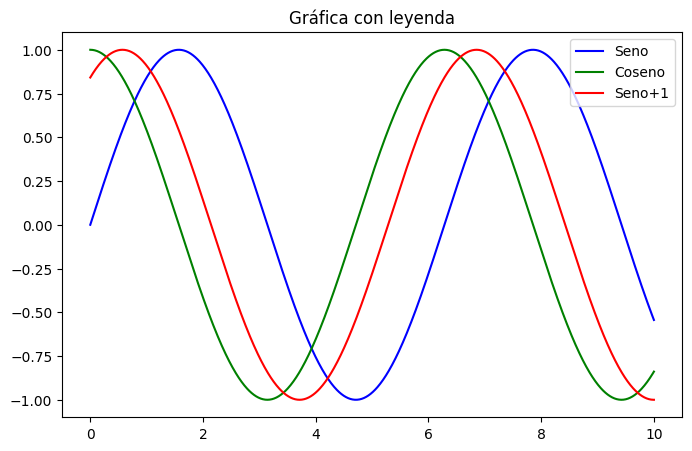

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x + 1)

plt.figure(figsize=(8,5))
plt.plot(x, y1, label='Seno', color='blue')
plt.plot(x, y2, label='Coseno', color='green')
plt.plot(x, y3, label='Seno+1', color='red')
plt.legend(loc='upper right')
plt.title("Gráfica con leyenda")
plt.savefig("grafica_matplotlib.png", dpi=300)
plt.show()


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import CheckboxGroup, CustomJS, Select
from bokeh.layouts import column
from bokeh.io import output_notebook
import numpy as np

output_notebook()

x = np.linspace(0, 10, 1000)  # Más puntos para líneas más suaves
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x + 1)

p = figure(width=600, height=400, title="Leyenda movible con casillas", output_backend="webgl")

line1 = p.line(x, y1, line_width=2, color="blue", legend_label="Seno",
               line_join="round", line_cap="round")
line2 = p.line(x, y2, line_width=2, color="green", legend_label="Coseno",
               line_join="round", line_cap="round")
line3 = p.line(x, y3, line_width=2, color="red", legend_label="Seno+1",
               line_join="round", line_cap="round")

p.legend.location = "top_right"

checkbox = CheckboxGroup(labels=["Mostrar Seno", "Mostrar Coseno", "Mostrar Seno+1"], active=[0,1,2])

callback_legend_vis = CustomJS(args=dict(legend=p.legend[0], checkbox=checkbox), code="""
    for (let i = 0; i < legend.items.length; i++) {
        let show = checkbox.active.includes(i);
        legend.items[i].visible = show;
    }
""")

checkbox.js_on_change('active', callback_legend_vis)

select = Select(title="Posición leyenda", value="top_right", options=[
    "top_left", "top_center", "top_right",
    "center_left", "center", "center_right",
    "bottom_left", "bottom_center", "bottom_right",
    "top", "left", "center", "right", "bottom"
])

callback_legend_pos = CustomJS(args=dict(legend=p.legend[0]), code="""
    legend.location = cb_obj.value;
""")

select.js_on_change('value', callback_legend_pos)

layout = column(select, checkbox, p)
show(layout)


In [ ]:
#######################################################################
#=================  USAR   ========================== al ultimp
#####################################################################
from bokeh.plotting import figure, show
from bokeh.models import CheckboxGroup, CustomJS, Select
from bokeh.layouts import column
from bokeh.io import output_notebook
import numpy as np

output_notebook()

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x + 1)

p = figure(width=600, height=400, title="Leyenda movible con casillas")

line1 = p.line(x, y1, line_width=2, color="blue", legend_label="Seno")
line2 = p.line(x, y2, line_width=2, color="green", legend_label="Coseno")
line3 = p.line(x, y3, line_width=2, color="red", legend_label="Seno+1")

p.legend.location = "top_right"

checkbox = CheckboxGroup(labels=["Mostrar Seno", "Mostrar Coseno", "Mostrar Seno+1"], active=[0,1,2])

callback_legend_vis = CustomJS(args=dict(legend=p.legend[0], checkbox=checkbox), code="""
    for (let i = 0; i < legend.items.length; i++) {
        let show = checkbox.active.includes(i);
        legend.items[i].visible = show;
    }
""")

checkbox.js_on_change('active', callback_legend_vis)

select = Select(title="Posición leyenda", value="top_right", options=[
    "top_left", "top_center", "top_right",
    "center_left", "center", "center_right",
    "bottom_left", "bottom_center", "bottom_right",
    "top", "left", "center", "right", "bottom"
])

callback_legend_pos = CustomJS(args=dict(legend=p.legend[0]), code="""
    legend.location = cb_obj.value;
""")

select.js_on_change('value', callback_legend_pos)

layout = column(select, checkbox, p)
show(layout)


In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Slider, CustomJS, GlyphRenderer, Line
from bokeh.layouts import column, row

output_notebook()

# ==== 1. Datos de ejemplo ====
x = list(range(10))
y1 = [i for i in range(10)]
y2 = [i**0.5 for i in range(10)]
y3 = [i**2/10 for i in range(10)]

p = figure(title="Series con control de grosor", width=600, height=400)

# ==== 2. Crear tres líneas (series)
linea1 = p.line(x, y1, line_width=2, color="blue", legend_label="Serie 1")
linea2 = p.line(x, y2, line_width=2, color="red", legend_label="Serie 2")
linea3 = p.line(x, y3, line_width=2, color="green", legend_label="Serie 3")

p.legend.click_policy = "hide"

# ==== 3. Sliders para cada línea
slider1 = Slider(start=0.5, end=5, value=2, step=0.5, title="Grosor Serie 1")
slider2 = Slider(start=0.5, end=5, value=2, step=0.5, title="Grosor Serie 2")
slider3 = Slider(start=0.5, end=5, value=2, step=0.5, title="Grosor Serie 3")

# ==== 4. Callbacks en JavaScript (para Colab)
callback1 = CustomJS(args=dict(glyph=linea1.glyph), code="""
    glyph.line_width = cb_obj.value;
""")
callback2 = CustomJS(args=dict(glyph=linea2.glyph), code="""
    glyph.line_width = cb_obj.value;
""")
callback3 = CustomJS(args=dict(glyph=linea3.glyph), code="""
    glyph.line_width = cb_obj.value;
""")

slider1.js_on_change("value", callback1)
slider2.js_on_change("value", callback2)
slider3.js_on_change("value", callback3)

# ==== 5. Mostrar
layout = column(p, slider1, slider2, slider3)
show(layout)


In [ ]:
!pip install bokeh

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import Slider, CustomJS
import numpy as np

output_notebook()

# Datos iniciales
x = np.linspace(0, 10, 200)
y = np.sin(x)

p = figure(width=600, height=400, title="Cuadrícula ajustable con Slider (JS callback)")
p.line(x, y, line_width=2)

# Ajuste inicial
p.xaxis[0].ticker.desired_num_ticks = 5
p.yaxis[0].ticker.desired_num_ticks = 5

# Slider en JavaScript
slider = Slider(start=2, end=20, value=5, step=1, title="Cantidad de divisiones")
slider.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0], py=p.yaxis[0]), code="""
    px.ticker.desired_num_ticks = cb_obj.value;
    py.ticker.desired_num_ticks = cb_obj.value;
"""))

# Mostrar
show(column(p, slider))


In [ ]:
!pip install bokeh

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import Slider, CustomJS
import numpy as np

output_notebook()

# Datos
x = np.linspace(0, 10, 200)
y = np.sin(x)

# Figura
p = figure(width=700, height=400, title="Ajuste en tiempo real de divisiones")
p.line(x, y, line_width=2)

# Etiquetas del eje X en vertical
p.xaxis.major_label_orientation = 1.57  # 90° en radianes

# Ajuste inicial
p.xaxis[0].ticker.desired_num_ticks = 5
p.yaxis[0].ticker.desired_num_ticks = 5

# Sliders independientes
slider_x = Slider(start=2, end=50, value=5, step=1, title="Divisiones en eje X")
slider_y = Slider(start=2, end=50, value=5, step=1, title="Divisiones en eje Y")

# Callbacks en JavaScript para tiempo real
slider_x.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0]), code="""
    px.ticker.desired_num_ticks = cb_obj.value;
"""))

slider_y.js_on_change("value", CustomJS(args=dict(py=p.yaxis[0]), code="""
    py.ticker.desired_num_ticks = cb_obj.value;
"""))

# Mostrar
show(column(p, slider_x, slider_y))


In [ ]:

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import Slider, CustomJS, DatetimeTickFormatter
import numpy as np
import pandas as pd

output_notebook()

# Datos de ejemplo con fecha y hora
fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")
y = np.sin(np.linspace(0, 4*np.pi, len(fechas)))

# Figura con eje datetime
p = figure(width=800, height=400, title="Fechas y horas en eje X",
           x_axis_type="datetime")

p.line(fechas, y, line_width=2)

# Formato para mostrar fecha y hora (Bokeh 3.x usa str, no lista)
p.xaxis.formatter = DatetimeTickFormatter(
    hours="%Y %b %d %H:%M:%S",
    days="%Y %b %d %H:%M:%S",
    months="%Y %b %d %H:%M:%S",
    years="%Y %b %d %H:%M:%S"
)

# Etiquetas verticales
p.xaxis.major_label_orientation = 1.57

# Ajustes iniciales
p.xaxis[0].ticker.desired_num_ticks = 5
p.yaxis[0].ticker.desired_num_ticks = 5

# Sliders independientes
slider_x = Slider(start=2, end=30, value=5, step=1, title="Divisiones en eje X (fecha y hora)")
slider_y = Slider(start=2, end=30, value=5, step=1, title="Divisiones en eje Y")

# Callbacks en JavaScript
slider_x.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0]), code="""
    px.ticker.desired_num_ticks = cb_obj.value;
"""))

slider_y.js_on_change("value", CustomJS(args=dict(py=p.yaxis[0]), code="""
    py.ticker.desired_num_ticks = cb_obj.value;
"""))

# Mostrar
show(column(p, slider_x, slider_y))


/tmp/ipython-input-4259961779.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")


In [ ]:
#######################################################################
#=================  USAR   ========================== ahora
#####################################################################

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.models import Slider, CustomJS, DatetimeTickFormatter, CheckboxGroup, Select
import numpy as np
import pandas as pd

output_notebook()

# Datos de ejemplo con fecha y hora
fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")
y = np.sin(np.linspace(0, 4*np.pi, len(fechas)))

# Figura con eje datetime
p = figure(width=800, height=400, title="Control de formato de fecha/hora",
           x_axis_type="datetime")

p.line(fechas, y, line_width=2)

# Formato inicial
formatter = DatetimeTickFormatter(
    hours="%Y %b %d %H:%M:%S",
    days="%Y %b %d %H:%M:%S",
    months="%Y %b %d %H:%M:%S",
    years="%Y %b %d %H:%M:%S"
)
p.xaxis.formatter = formatter
p.xaxis.major_label_orientation = 1.57  # vertical

# Ajustes iniciales
p.xaxis[0].ticker.desired_num_ticks = 5
p.yaxis[0].ticker.desired_num_ticks = 5

# Sliders para divisiones
slider_x = Slider(start=2, end=30, value=5, step=1, title="Divisiones en eje X")
slider_y = Slider(start=2, end=30, value=5, step=1, title="Divisiones en eje Y")

# Checkboxes para formato
checkboxes = CheckboxGroup(labels=["Año", "Mes", "Día", "Hora"], active=[0,1,2,3])

# Selector para orientación
orientation_select = Select(title="Orientación etiquetas X", value="Vertical",
                            options=["Vertical", "Horizontal"])

# JavaScript para sliders
slider_x.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0]), code="""
    px.ticker.desired_num_ticks = cb_obj.value;
"""))

slider_y.js_on_change("value", CustomJS(args=dict(py=p.yaxis[0]), code="""
    py.ticker.desired_num_ticks = cb_obj.value;
"""))

# JavaScript para checkboxes (formato dinámico con casos especiales)
checkboxes.js_on_change("active", CustomJS(args=dict(px=p.xaxis[0]), code="""
    const parts = {0: "%Y", 1: "%b", 2: "%d", 3: "%H:%M:%S"};
    let active = cb_obj.active.sort();
    let fmt = active.map(i => parts[i]);

    let format_str = "";
    // Caso especial Día + Hora
    if (active.length === 2 && active.includes(2) && active.includes(3)) {
        format_str = "%d %H:%M:%S";
    }
    // Caso especial Año + Mes + Día
    else if (active.length === 3 && active.includes(0) && active.includes(1) && active.includes(2)) {
        format_str = "%Y %b %d";
    }
    else {
        format_str = fmt.join(" ");
    }

    px.formatter.hours = format_str;
    px.formatter.days = format_str;
    px.formatter.months = format_str;
    px.formatter.years = format_str;
    px.change.emit();  // refrescar eje
"""))

# JavaScript para orientación
orientation_select.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0]), code="""
    if (cb_obj.value === "Vertical") {
        px.major_label_orientation = 1.57;
    } else {
        px.major_label_orientation = 0;
    }
"""))

# Mostrar todo
layout = column(
    p,
    row(slider_x, slider_y),
    checkboxes,
    orientation_select
)

show(layout)


/tmp/ipython-input-1593666879.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")


In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.models import Slider, CustomJS, DatetimeTickFormatter, CheckboxGroup, Select
import numpy as np
import pandas as pd

output_notebook()

# Datos de ejemplo con fecha y hora
fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")
y = np.sin(np.linspace(0, 4*np.pi, len(fechas)))

# Figura con eje datetime
p = figure(width=800, height=400, title="Control de formato de fecha/hora",
           x_axis_type="datetime")

p.line(fechas, y, line_width=2)

# Formato inicial
formatter = DatetimeTickFormatter(
    hours="%Y %b %d %H:%M:%S",
    days="%Y %b %d %H:%M:%S",
    months="%Y %b %d %H:%M:%S",
    years="%Y %b %d %H:%M:%S"
)
p.xaxis.formatter = formatter
p.xaxis.major_label_orientation = 1.57  # vertical

# Ajustes iniciales
p.xaxis[0].ticker.desired_num_ticks = 5
p.yaxis[0].ticker.desired_num_ticks = 5

# Sliders para divisiones
slider_x = Slider(start=2, end=30, value=5, step=1, title="Divisiones en eje X")
slider_y = Slider(start=2, end=30, value=5, step=1, title="Divisiones en eje Y")

# Checkboxes para formato
checkboxes = CheckboxGroup(labels=["Año", "Mes", "Día", "Hora"], active=[0,1,2,3])

# Selector para orientación
orientation_select = Select(title="Orientación etiquetas X", value="Vertical",
                            options=["Vertical", "Horizontal"])

# JavaScript para sliders
slider_x.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0]), code="""
    px.ticker.desired_num_ticks = cb_obj.value;
"""))

slider_y.js_on_change("value", CustomJS(args=dict(py=p.yaxis[0]), code="""
    py.ticker.desired_num_ticks = cb_obj.value;
"""))

# JavaScript para checkboxes (formato dinámico con casos especiales)
checkboxes.js_on_change("active", CustomJS(args=dict(px=p.xaxis[0]), code="""
    const parts = {0: "%Y", 1: "%b", 2: "%d", 3: "%H:%M:%S"};
    let active = cb_obj.active.sort();
    let fmt = active.map(i => parts[i]);

    let format_str = "";
    // Caso especial Día + Hora
    if (active.length === 2 && active.includes(2) && active.includes(3)) {
        format_str = "%d %H:%M:%S";
    }
    // Caso especial Año + Mes + Día
    else if (active.length === 3 && active.includes(0) && active.includes(1) && active.includes(2)) {
        format_str = "%Y %b %d";
    }
    else {
        format_str = fmt.join(" ");
    }

    px.formatter.hours = format_str;
    px.formatter.days = format_str;
    px.formatter.months = format_str;
    px.formatter.years = format_str;
    px.change.emit();  // refrescar eje
"""))

# JavaScript para orientación
orientation_select.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0]), code="""
    if (cb_obj.value === "Vertical") {
        px.major_label_orientation = 1.57;
    } else {
        px.major_label_orientation = 0;
    }
"""))

# Mostrar todo
layout = column(
    p,
    row(slider_x, slider_y),
    checkboxes,
    orientation_select
)

show(layout)


/tmp/ipython-input-1593666879.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")


In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.models import Slider, CustomJS, DatetimeTickFormatter, CheckboxGroup, Select
import numpy as np
import pandas as pd

output_notebook()

# Datos de ejemplo con fecha y hora
fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")
y = np.sin(np.linspace(0, 4*np.pi, len(fechas)))

# Figura con eje datetime
p = figure(width=800, height=400, title="Control de formato de fecha/hora",
           x_axis_type="datetime")

p.line(fechas, y, line_width=2)

# Formato inicial
formatter = DatetimeTickFormatter(
    hours="%Y %b %d %H:%M",
    days="%Y %b %d %H:%M",
    months="%Y %b %d %H:%M",
    years="%Y %b %d %H:%M"
)
p.xaxis.formatter = formatter
p.xaxis.major_label_orientation = 1.57  # vertical

# Ajustes iniciales
p.xaxis[0].ticker.desired_num_ticks = 5
p.yaxis[0].ticker.desired_num_ticks = 5

# Sliders para divisiones
slider_x = Slider(start=2, end=30, value=5, step=1, title="Divisiones en eje X")
slider_y = Slider(start=2, end=30, value=5, step=1, title="Divisiones en eje Y")

# Checkboxes para formato
checkboxes = CheckboxGroup(labels=["Año", "Mes", "Día", "Hora"], active=[0,1,2,3])

# Selector para orientación
orientation_select = Select(title="Orientación etiquetas X", value="Vertical",
                            options=["Vertical", "Horizontal"])

# JavaScript para sliders
slider_x.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0]), code="""
    px.ticker.desired_num_ticks = cb_obj.value;
"""))

slider_y.js_on_change("value", CustomJS(args=dict(py=p.yaxis[0]), code="""
    py.ticker.desired_num_ticks = cb_obj.value;
"""))

# JavaScript para checkboxes (formato dinámico con casos especiales)
checkboxes.js_on_change("active", CustomJS(args=dict(px=p.xaxis[0]), code="""
    const parts = {0: "%Y", 1: "%b", 2: "%d", 3: "%H:%M"};
    let active = cb_obj.active.slice().sort();

    let fmt_hours = "";
    let fmt_days = "";
    let fmt_months = "";
    let fmt_years = "";

    if (active.length === 2 && active.includes(2) && active.includes(3)) {
        // Día + Hora
        fmt_hours = "%d %H:%M";
        fmt_days = "%d %H:%M";
        fmt_months = "%d %H:%M";
        fmt_years = "%d %H:%M";
    } else if (active.length === 3 && active.includes(0) && active.includes(1) && active.includes(2)) {
        // Año + Mes + Día
        fmt_years = "%Y";
        fmt_months = "%b %Y";
        fmt_days = "%d %b";
        fmt_hours = "%d %H:%M";
    } else {
        // Formato por separado según granularidad
        fmt_years = active.includes(0) ? "%Y" : "";
        fmt_months = active.includes(1) ? "%b" : "";
        fmt_days = active.includes(2) ? "%d" : "";
        fmt_hours = active.includes(3) ? "%H:%M" : "";

        // Construir formatos combinados para cada granularidad
        fmt_months = fmt_months && fmt_years ? fmt_months + " " + fmt_years : fmt_months || fmt_years;
        fmt_days = fmt_days && fmt_months ? fmt_days + " " + fmt_months : fmt_days || fmt_months;
        fmt_hours = fmt_hours && fmt_days ? fmt_days + " " + fmt_hours : fmt_hours || fmt_days;
    }

    px.formatter.hours = fmt_hours;
    px.formatter.days = fmt_days;
    px.formatter.months = fmt_months;
    px.formatter.years = fmt_years;
    px.change.emit();
"""))

# JavaScript para orientación
orientation_select.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0]), code="""
    if (cb_obj.value === "Vertical") {
        px.major_label_orientation = 1.57;
    } else {
        px.major_label_orientation = 0;
    }
"""))

# Mostrar todo
layout = column(
    p,
    row(slider_x, slider_y),
    checkboxes,
    orientation_select
)

show(layout)


/tmp/ipython-input-3427434259.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")


In [ ]:

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import DatetimeTickFormatter
import pandas as pd
import numpy as np

output_notebook()

# Datos con fecha y hora
fechas = pd.date_range("1955-06-01 00:00:00", periods=48, freq='30min')
y = np.sin(np.linspace(0, 8*np.pi, len(fechas)))

# Figura principal con eje datetime
p = figure(width=900, height=400, x_axis_type='datetime', title="Eje X con fecha y hora (doble eje)")

p.line(fechas, y, line_width=2)

# Formatear eje X principal para que muestre la fecha
p.xaxis.formatter = DatetimeTickFormatter(
    days="%Y %b %d",
    months="%Y %b %d",
    years="%Y %b %d"
)

# Crear segundo eje X (arriba) para las horas
p.extra_x_ranges = {"hora_range": p.x_range}  # comparte rango con eje principal
p.add_layout(
    p.xaxis[0].clone(),  # clonar eje
    'above'              # colocar arriba
)

# Ahora configuramos ese eje extra (el que está arriba) para que muestre solo horas
# El clon se guarda en p.above[0] (primer eje arriba)
p.above[0].formatter = DatetimeTickFormatter(
    hours="%H:%M",
    minutes="%H:%M",
    seconds="%H:%M"
)

# Orientaciones para evitar encimar etiquetas
p.xaxis.major_label_orientation = 0.7  # fechas (abajo)
p.above[0].major_label_orientation = 0.7  # horas (arriba)

show(p)


In [ ]:
!pip install bokeh pandas

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.models import Slider, CustomJS, DatetimeTickFormatter, CheckboxGroup, Select, CheckboxButtonGroup, LinearAxis, Range1d
import numpy as np
import pandas as pd

output_notebook()

# Datos ejemplo
fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")
y = np.sin(np.linspace(0, 4*np.pi, len(fechas)))

p = figure(width=800, height=400, title="Eje X con fecha y eje hora arriba con casilla",
           x_axis_type="datetime")

p.line(fechas, y, line_width=2)

# Formato eje X principal (fecha)
p.xaxis.formatter = DatetimeTickFormatter(
    hours="%Y %b %d %H:%M:%S",
    days="%Y %b %d",
    months="%Y %b %d",
    years="%Y %b %d"
)
p.xaxis.major_label_orientation = 1.57

# Crear rango compartido para eje extra arriba
p.extra_x_ranges = {"hora_range": p.x_range}

# Crear eje extra arriba (solo horas)
hora_axis = LinearAxis(x_range_name="hora_range",
                       formatter=DatetimeTickFormatter(
                           hours="%H:%M",
                           minutes="%H:%M",
                           seconds="%H:%M"
                       ),
                       major_label_orientation=1.57,
                       visible=False)

p.add_layout(hora_axis, 'above')

# Sliders para divisiones
slider_x = Slider(start=2, end=30, value=7, step=1, title="Divisiones en eje X")
slider_y = Slider(start=2, end=30, value=7, step=1, title="Divisiones en eje Y")

# Checkbox para formato etiquetas eje principal
checkboxes = CheckboxGroup(labels=["Año", "Mes", "Día", "Hora"], active=[0,1,2,3])

# Selector para orientación etiquetas
orientation_select = Select(title="Orientación etiquetas X", value="Vertical",
                            options=["Vertical", "Horizontal"])

# Checkbox para mostrar/ocultar eje hora arriba
show_hora_checkbox = CheckboxButtonGroup(labels=["Mostrar eje Hora arriba"], active=[])

# JS callback para divisiones eje X
slider_x.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0], ha=hora_axis), code="""
    px.ticker.desired_num_ticks = cb_obj.value;
    ha.ticker.desired_num_ticks = cb_obj.value;
"""))

# JS callback para divisiones eje Y
slider_y.js_on_change("value", CustomJS(args=dict(py=p.yaxis[0]), code="""
    py.ticker.desired_num_ticks = cb_obj.value;
"""))

# JS callback para formato etiquetas eje principal
checkboxes.js_on_change("active", CustomJS(args=dict(px=p.xaxis[0]), code="""
    const parts = {0: "%Y", 1: "%b", 2: "%d", 3: "%H:%M:%S"};
    let fmt = [];
    cb_obj.active.forEach(i => fmt.push(parts[i]));
    let format_str = fmt.join(" ");
    px.formatter.hours = format_str;
    px.formatter.days = format_str;
    px.formatter.months = format_str;
    px.formatter.years = format_str;
"""))

# JS callback para orientación etiquetas
orientation_select.js_on_change("value", CustomJS(args=dict(px=p.xaxis[0], ha=hora_axis), code="""
    if (cb_obj.value === "Vertical") {
        px.major_label_orientation = 1.57;
        ha.major_label_orientation = 1.57;
    } else {
        px.major_label_orientation = 0;
        ha.major_label_orientation = 0;
    }
"""))

# JS callback para mostrar/ocultar eje hora arriba
show_hora_checkbox.js_on_change("active", CustomJS(args=dict(ha=hora_axis), code="""
    ha.visible = (cb_obj.active.length > 0);
"""))

layout = column(
    p,
    row(slider_x, slider_y),
    checkboxes,
    orientation_select,
    show_hora_checkbox
)

show(layout)


/tmp/ipython-input-3388502904.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range("1955-06-01 00:00:00", periods=24, freq="H")


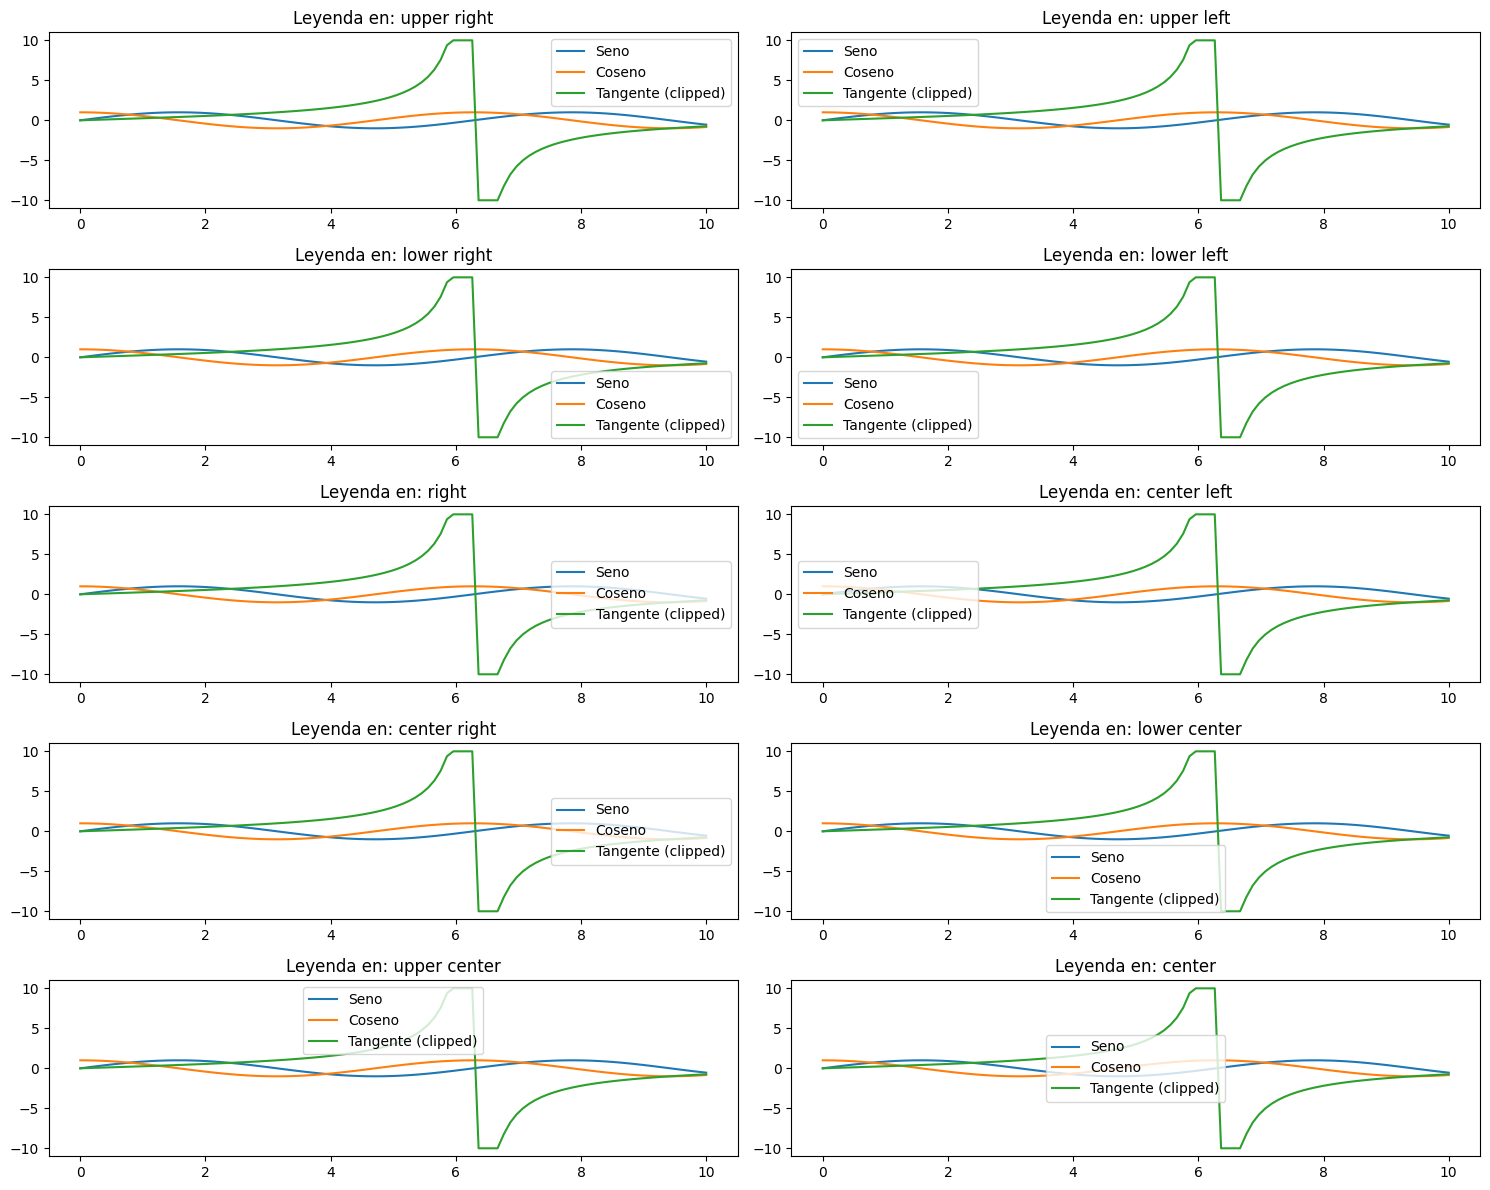

In [ ]:
#leyendas
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x / 4)

# Lista de posiciones de leyenda
posiciones = ['upper right', 'upper left', 'lower right', 'lower left', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']

plt.figure(figsize=(15, 12))

for i, pos in enumerate(posiciones, 1):
    plt.subplot(5, 2, i)
    plt.plot(x, y1, label='Seno')
    plt.plot(x, y2, label='Coseno')
    # Limitamos la tangente para que no explote
    plt.plot(x, np.clip(y3, -10, 10), label='Tangente (clipped)')
    plt.title(f'Leyenda en: {pos}')
    plt.legend(loc=pos)
    plt.tight_layout()

plt.show()


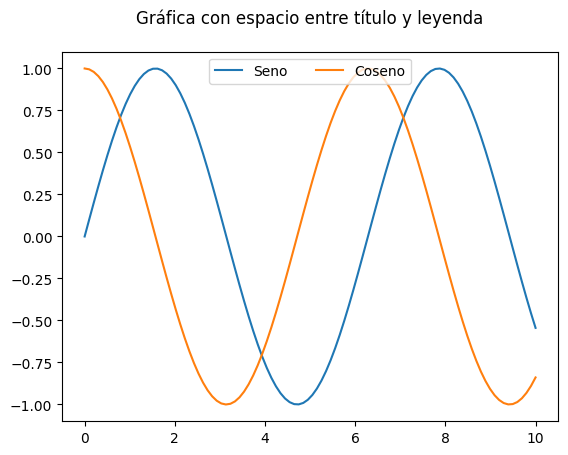

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label='Seno')
plt.plot(x, y2, label='Coseno')

# Poner título con espacio extra (pad)
plt.title('Gráfica con espacio entre título y leyenda', pad=20)  # pad aumenta el espacio vertical

# Leyenda arriba, centrada, debajo del título
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.show()


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import Div
from bokeh.layouts import column
from bokeh.io import output_notebook
import numpy as np

output_notebook()

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

p = figure(width=600, height=400, toolbar_location=None, title=None)

p.line(x, y1, line_width=2, color="blue")
p.line(x, y2, line_width=2, color="green")

# Crear Div para título
titulo = Div(text="<h2 style='text-align:center;'>Gráfica con leyenda fuera del gráfico</h2>", width=600)

# Crear Div para leyenda simulada
leyenda_html = """
<div style='text-align:center; font-size:14pt; margin-bottom:10px;'>
  <span style='color:blue;'>&#8212;&#8212;&#8212;</span> Seno &nbsp;&nbsp;&nbsp;
  <span style='color:green;'>&#8212;&#8212;&#8212;</span> Coseno
</div>
"""
leyenda = Div(text=leyenda_html, width=600)

layout = column(titulo, leyenda, p)

show(layout)


In [ ]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import export_png
import numpy as np

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

p = figure(width=600, height=400, title="Gráfica con leyenda arriba para exportar")

p.line(x, y1, line_width=2, color="blue", legend_label="Seno")
p.line(x, y2, line_width=2, color="green", legend_label="Coseno")

# Leyenda arriba, horizontal, con fondo transparente y sin borde
p.legend.location = "top_center"
p.legend.orientation = "horizontal"
p.legend.background_fill_alpha = 0
p.legend.border_line_color = None

# Ajustar márgenes para que la leyenda no tape el gráfico
p.min_border_top = 60

# Mover título para separar de la leyenda
p.title.offset = 40
p.title.text_font_size = "16pt"

output_file("grafica_con_leyenda.html")
show(p)

# Para exportar a PNG (requiere instalación de selenium y chromedriver)
# export_png(p, filename="grafica_con_leyenda.png")


In [ ]:
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.models import Div
from bokeh.io import output_notebook
import numpy as np

output_notebook()

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

p = figure(width=600, height=400, toolbar_location=None, title="Gráfica sin leyenda interna")

p.line(x, y1, line_width=2, color="blue")
p.line(x, y2, line_width=2, color="green")

# Leyenda simulada con Div (HTML+CSS)
leyenda_html = """
<div style='text-align:center; font-size:14pt; margin-bottom:10px;'>
  <span style='color:blue;'>&#8212;&#8212;&#8212;</span> Seno &nbsp;&nbsp;&nbsp;
  <span style='color:green;'>&#8212;&#8212;&#8212;</span> Coseno
</div>
"""

leyenda = Div(text=leyenda_html, width=600)

layout = column(leyenda, p)
show(layout)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.layouts import column
from bokeh.io import output_notebook
import numpy as np

output_notebook()

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

p = figure(width=600, height=400, title="Gráfica con leyenda controlada por casilla")

line1 = p.line(x, y1, line_width=2, color="blue", legend_label="Seno")
line2 = p.line(x, y2, line_width=2, color="green", legend_label="Coseno")

p.legend.location = "top_right"
p.legend.click_policy = "hide"

# Checkbox para mostrar/ocultar leyenda
checkbox = CheckboxGroup(labels=["Mostrar leyenda"], active=[0])

# JavaScript callback para mostrar/ocultar leyenda
callback = CustomJS(args=dict(legend=p.legend[0], checkbox=checkbox), code="""
    legend.visible = checkbox.active.includes(0)
""")

checkbox.js_on_change('active', callback)

layout = column(checkbox, p)
show(layout)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import CheckboxGroup, CustomJS, Div
from bokeh.layouts import column, row
from bokeh.io import output_notebook
import numpy as np

output_notebook()

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x + 1)

p = figure(width=600, height=400, title="Gráfica con leyenda y casillas independientes")

line1 = p.line(x, y1, line_width=2, color="blue")
line2 = p.line(x, y2, line_width=2, color="green")
line3 = p.line(x, y3, line_width=2, color="red")

# Crear casillas independientes para cada línea
checkbox = CheckboxGroup(labels=["Seno", "Coseno", "Seno+1"], active=[0,1,2])

# Leyenda simulada en HTML (puedes mover este Div donde quieras en el layout)
leyenda_html = """
<div style='font-size:14pt;'>
  <span style='color:blue;'>&#8212;&#8212;&#8212;</span> Seno<br>
  <span style='color:green;'>&#8212;&#8212;&#8212;</span> Coseno<br>
  <span style='color:red;'>&#8212;&#8212;&#8212;</span> Seno+1
</div>
"""
leyenda = Div(text=leyenda_html, width=150)

# JS callback para mostrar/ocultar líneas según casillas
callback = CustomJS(args=dict(line1=line1, line2=line2, line3=line3, checkbox=checkbox), code="""
    line1.visible = checkbox.active.includes(0);
    line2.visible = checkbox.active.includes(1);
    line3.visible = checkbox.active.includes(2);
""")

checkbox.js_on_change('active', callback)

# Layout con leyenda a la izquierda y gráfico a la derecha
layout = row(column(checkbox, leyenda), p)

show(layout)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.layouts import column
from bokeh.io import output_notebook
import numpy as np

output_notebook()

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x + 1)

p = figure(width=600, height=400, title="Controlar visibilidad solo de la leyenda")

line1 = p.line(x, y1, line_width=2, color="blue", legend_label="Seno")
line2 = p.line(x, y2, line_width=2, color="green", legend_label="Coseno")
line3 = p.line(x, y3, line_width=2, color="red", legend_label="Seno+1")

p.legend.location = "top_right"

checkbox = CheckboxGroup(labels=["Mostrar Seno", "Mostrar Coseno", "Mostrar Seno+1"], active=[0,1,2])

callback = CustomJS(args=dict(legend=p.legend[0], checkbox=checkbox), code="""
    // Para cada ítem de leyenda, controlamos su visibilidad
    for (let i = 0; i < legend.items.length; i++) {
        let show = checkbox.active.includes(i);
        // Cambiar visibilidad del ítem de leyenda, pero NO la línea en el plot
        legend.items[i].visible = show;
    }
""")

checkbox.js_on_change('active', callback)

show(column(checkbox, p))


In [ ]:
from bokeh.models import Select

select = Select(title="Posición leyenda", value="top_right", options=[
    "top_left", "top_center", "top_right",
    "center_left", "center", "center_right",
    "bottom_left", "bottom_center", "bottom_right",
    "top", "left", "center", "right", "bottom"
])

select.js_on_change('value', CustomJS(args=dict(legend=p.legend[0]), code="""
    legend.location = cb_obj.value;
"""))

show(column(select, checkbox, p))


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, CustomJS, Slider, ColorPicker, Button, TextInput
from bokeh.models.tools import PointDrawTool, FreehandDrawTool
from bokeh.layouts import column, row
from bokeh.models import PolyDrawTool, PolyEditTool

output_notebook()

# --- Fuente de datos original ---
source = ColumnDataSource(data=dict(x=[1, 2, 3, 4], y=[4, 3, 2, 1]))

# --- Figuras para texto y líneas dibujadas ---
freehand_source = ColumnDataSource(data=dict(xs=[], ys=[]))  # Dibujos a mano
text_source = ColumnDataSource(data=dict(x=[], y=[], text=[], text_color=[], text_font_size=[]))  # Anotaciones

# --- Figura principal ---
p = figure(title="Dibujo interactivo y anotaciones", width=800, height=500, tools="pan,wheel_zoom,reset")

# --- Gráfico de datos originales ---
p.circle('x', 'y', source=source, size=10, color="navy", alpha=0.6)

# --- Herramienta de dibujo a mano alzada (freehand) ---
p.multi_line(xs='xs', ys='ys', source=freehand_source, line_color="black", line_width=3)

# --- Herramienta de anotaciones de texto ---
p.text(x='x', y='y', text='text', text_color='text_color', text_font_size='text_font_size', source=text_source)

# --- Herramientas ---
freehand_tool = FreehandDrawTool(renderers=[p.renderers[-2]], num_objects=50)
p.add_tools(freehand_tool)
p.toolbar.active_drag = freehand_tool

# === Widgets de control ===
color_picker = ColorPicker(title="Color de pluma", color="black")
grosor_slider = Slider(title="Grosor de pluma", start=1, end=10, value=3, step=1)
texto_input = TextInput(title="Texto a agregar", placeholder="Escribe algo...")
boton_anotar = Button(label="Agregar texto", button_type="success")

# === JS para cambiar color y grosor ===
callback_styling = CustomJS(args=dict(renderer=p.renderers[-2],
                                      color_picker=color_picker,
                                      grosor_slider=grosor_slider), code="""
    renderer.glyph.line_color = color_picker.color;
    renderer.glyph.line_width = grosor_slider.value;
""")
color_picker.js_on_change('color', callback_styling)
grosor_slider.js_on_change('value', callback_styling)

# === JS para agregar texto en clic ===
callback_text = CustomJS(args=dict(source=text_source,
                                   p=p,
                                   text_input=texto_input,
                                   color_picker=color_picker), code="""
    const text = text_input.value;
    if (text.trim() === "") return;

    const x = p.frame.x_scale.invert(p.event.x);
    const y = p.frame.y_scale.invert(p.event.y);

    source.data.x.push(x);
    source.data.y.push(y);
    source.data.text.push(text);
    source.data.text_color.push(color_picker.color);
    source.data.text_font_size.push("14pt");
    source.change.emit();
""")
boton_anotar.js_on_event('tap', callback_text)

# === Mostrar en Colab ===
show(column(
    p,
    row(color_picker, grosor_slider),
    row(texto_input, boton_anotar)
))


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import (
    ColumnDataSource, FreehandDrawTool, PointDrawTool,
    ColorPicker, Slider, TextInput, Button, CustomJS, Div
)
from bokeh.layouts import column, row

output_notebook()

# Fuente para dibujo libre (líneas)
line_source = ColumnDataSource(data=dict(xs=[], ys=[], line_color=[], line_width=[]))

# Fuente para anotaciones de texto
text_source = ColumnDataSource(data=dict(x=[], y=[], text=[], text_color=[], text_font_size=[]))

# Figura base con datos de ejemplo
p = figure(title="Dibujo y texto interactivo (Google Colab compatible)", width=800, height=500, tools="pan,wheel_zoom,reset")
p.circle([1, 2, 3, 4], [6, 7, 2, 4], size=10, color="navy", alpha=0.6)

# Renderers para dibujo y texto
renderer_lines = p.multi_line(xs='xs', ys='ys', line_color='line_color', line_width='line_width', source=line_source)
renderer_text = p.text(x='x', y='y', text='text', text_color='text_color', text_font_size='text_font_size', source=text_source)

# Herramientas
draw_tool = FreehandDrawTool(renderers=[renderer_lines], num_objects=100)
point_draw_tool = PointDrawTool(renderers=[renderer_text], add=False)
p.add_tools(draw_tool, point_draw_tool)

# Por defecto activamos dibujo
p.toolbar.active_drag = draw_tool

# Widgets de control
color_picker = ColorPicker(title="Color de la pluma", color="black")
grosor_slider = Slider(title="Grosor de la pluma", start=1, end=10, value=3, step=1)
text_input = TextInput(title="Texto para agregar", placeholder="Escribe texto aquí")

btn_add_text = Button(label="Activar modo texto (click para agregar)", button_type="primary")
btn_move_text = Button(label="Activar modo mover texto", button_type="warning")
btn_draw = Button(label="Activar modo dibujo", button_type="success")
btn_delete_last_line = Button(label="Borrar última línea dibujada", button_type="danger")
btn_delete_last_text = Button(label="Borrar última anotación de texto", button_type="danger")
status_div = Div(text="<b>Estado:</b> Modo dibujo activo", width=400)

# Cambiar color y grosor solo para nuevas líneas
callback_style = CustomJS(args=dict(renderer=renderer_lines, color_picker=color_picker, grosor_slider=grosor_slider), code="""
    renderer.glyph.line_color = color_picker.color;
    renderer.glyph.line_width = grosor_slider.value;
""")
color_picker.js_on_change('color', callback_style)
grosor_slider.js_on_change('value', callback_style)

# Activar modo texto: usa evento tap para agregar texto
callback_activate_text = CustomJS(args=dict(plot=p, status=status_div), code="""
    plot.toolbar.active_drag = null;
    status.text = "<b>Estado:</b> Modo texto activo - Haz clic para agregar texto";
""")
btn_add_text.js_on_click(callback_activate_text)

# Activar mover texto
callback_move_text = CustomJS(args=dict(plot=p, status=status_div), code="""
    plot.toolbar.active_drag = plot.tools.find(tool => tool.type === "PointDrawTool");
    status.text = "<b>Estado:</b> Modo mover texto activo";
""")
btn_move_text.js_on_click(callback_move_text)

# Activar dibujo
callback_draw = CustomJS(args=dict(plot=p, status=status_div), code="""
    plot.toolbar.active_drag = plot.tools.find(tool => tool.type === "FreehandDrawTool");
    status.text = "<b>Estado:</b> Modo dibujo activo";
""")
btn_draw.js_on_click(callback_draw)

# Borrar última línea dibujada
btn_delete_last_line.js_on_click(CustomJS(args=dict(source=line_source, status=status_div), code="""
    if(source.data['xs'].length > 0){
        for(const key in source.data){
            source.data[key].pop();
        }
        source.change.emit();
        status.text = "<b>Estado:</b> Última línea borrada";
    } else {
        status.text = "<b>Estado:</b> No hay líneas para borrar";
    }
"""))

# Borrar última anotación de texto
btn_delete_last_text.js_on_click(CustomJS(args=dict(source=text_source, status=status_div), code="""
    if(source.data['x'].length > 0){
        for(const key in source.data){
            source.data[key].pop();
        }
        source.change.emit();
        status.text = "<b>Estado:</b> Última anotación borrada";
    } else {
        status.text = "<b>Estado:</b> No hay anotaciones para borrar";
    }
"""))

# Evento JS para agregar texto con click en gráfica, solo si modo texto activo
callback_add_text = CustomJS(args=dict(source=text_source, text_input=text_input, status=status_div), code="""
    const active_tool = Bokeh.documents[0].get_model_by_name('active_tool');
    if (active_tool != 'text_mode'){
        return;
    }
    const text = text_input.value.trim();
    if(text === ""){
        alert("Escribe texto para agregar");
        return;
    }
    const x = cb_obj.x;
    const y = cb_obj.y;
    source.data.x.push(x);
    source.data.y.push(y);
    source.data.text.push(text);
    source.data.text_color.push("black");
    source.data.text_font_size.push("14pt");
    source.change.emit();
    status.text = "<b>Estado:</b> Texto agregado en (" + x.toFixed(2) + ", " + y.toFixed(2) + ")";
""")

# Para controlar modo texto activado (se usará botón para activar)
# Implementamos variable global JS que controlamos con botones

toggle_text_mode_js = CustomJS(args=dict(plot=p, status=status_div), code="""
    if(!window.text_mode_active){
        window.text_mode_active = true;
        status.text = "<b>Estado:</b> Modo texto activo - Haz clic para agregar texto";
    } else {
        window.text_mode_active = false;
        status.text = "<b>Estado:</b> Modo texto desactivado";
    }
""")

btn_add_text.js_on_click(toggle_text_mode_js)

# Para que el evento tap funcione para agregar texto cuando el modo texto está activo
p.js_on_event('tap', CustomJS(args=dict(source=text_source, text_input=text_input, status=status_div), code="""
    if(window.text_mode_active){
        const text = text_input.value.trim();
        if(text === ""){
            alert("Escribe texto para agregar");
            return;
        }
        const x = cb_obj.x;
        const y = cb_obj.y;
        source.data.x.push(x);
        source.data.y.push(y);
        source.data.text.push(text);
        source.data.text_color.push("black");
        source.data.text_font_size.push("14pt");
        source.change.emit();
        status.text = "<b>Estado:</b> Texto agregado en (" + x.toFixed(2) + ", " + y.toFixed(2) + ")";
    }
"""))

# Layout
controls = column(
    row(color_picker, grosor_slider),
    row(btn_draw, btn_move_text, btn_add_text),
    row(btn_delete_last_line, btn_delete_last_text),
    status_div,
    text_input
)

show(column(p, controls))


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
import numpy as np

output_notebook()

# === Datos simulados ===
x = np.linspace(0, 10, 100)

# Gráfica 1: Seno
p1 = figure(title="Seno")
p1.line(x, np.sin(x), line_color="blue")

# Gráfica 2: Coseno
p2 = figure(title="Coseno")
p2.line(x, np.cos(x), line_color="green")

# Gráfica 3: Tangente (limitada en rango)
p3 = figure(title="Tangente", y_range=(-5, 5))
p3.line(x, np.tan(x), line_color="red")

# Gráfica 4: x^2
p4 = figure(title="Cuadrado")
p4.line(x, x**2, line_color="orange")

# === Organizar en cuadrícula 2x2 ===
dashboard = gridplot([[p1, p2],
                      [p3, p4]])

show(dashboard)


In [ ]:
from google.colab import files
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot, column
from bokeh.models import Div
import io

output_notebook()

# === Paso 1: Subir archivos ===
uploaded = files.upload()  # Subir varios archivos .dat

# === Paso 2: Mostrar nombres de archivos en una casilla HTML ===
lista_archivos = list(uploaded.keys())
div_lista = Div(text="<b>Archivos seleccionados:</b><ul>" + ''.join(f"<li>{a}</li>" for a in lista_archivos) + "</ul>",
                width=600, height=100)

# === Paso 3: Leer cada archivo y graficar ===
graficas = []

for nombre in uploaded.keys():
    content = uploaded[nombre]

    try:
        # Leer archivo .dat como texto delimitado por espacios
        df = pd.read_csv(io.StringIO(content.decode('utf-8')), delim_whitespace=True, header=None)

        if df.shape[1] >= 2:
            x = df.iloc[:, 0]
            y = df.iloc[:, 1]

            p = figure(title=f"{nombre}", width=350, height=300)
            p.line(x, y, line_width=2)
            graficas.append(p)
        else:
            print(f"⚠️ El archivo '{nombre}' no tiene al menos dos columnas.")

    except Exception as e:
        print(f"❌ Error al procesar '{nombre}': {e}")

# === Paso 4: Mostrar gráficas en una cuadrícula (2 por fila) + lista de archivos ===
filas = [graficas[i:i+2] for i in range(0, len(graficas), 2)]
dashboard = gridplot(filas)

layout = column(div_lista, dashboard)

show(layout)


Saving h316a61.dat to h316a61.dat
❌ Error al procesar 'h316a61.dat': Error tokenizing data. C error: Expected 10 fields in line 2, saw 15



/tmp/ipython-input-1469751402.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO(content.decode('utf-8')), delim_whitespace=True, header=None)
